In [671]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [672]:
f = open('goodreads_books_mystery_thriller_crime.json')

In [673]:
#data = json.load(f)

In [674]:
#data[0:2]

In [675]:
df_full = pd.read_json('goodreads_books_mystery_thriller_crime.json')

In [676]:
df_full.head()

,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,...,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
0,184737297X,15,[169353],US,,"[{'count': '159', 'name': 'to-read'}, {'count'...",,false,3.93,B007YLTG5I,...,4,,2009,https://www.goodreads.com/book/show/6066814-cr...,https://images.gr-assets.com/books/1328724803m...,6066814,186,6243149,"Crowner Royal (Crowner John Mystery, #13)","Crowner Royal (Crowner John Mystery, #13)"
1,,60,[1052227],US,eng,"[{'count': '54', 'name': 'currently-reading'},...",B01NCIKAQX,true,4.33,B01NCIKAQX,...,,,,https://www.goodreads.com/book/show/33394837-t...,https://images.gr-assets.com/books/1493114742m...,33394837,269,54143148,The House of Memory (Pluto's Snitch #2),The House of Memory (Pluto's Snitch #2)
2,,23,[953679],US,eng,"[{'count': '90', 'name': 'to-read'}, {'count':...",B01ALOWJN0,true,3.49,B01ALOWJN0,...,,,,https://www.goodreads.com/book/show/29074697-t...,https://s.gr-assets.com/assets/nophoto/book/11...,29074697,192,49305010,The Slaughtered Virgin of Zenopolis (Inspector...,The Slaughtered Virgin of Zenopolis (Inspector...
3,0854563903,8,[408775],US,,"[{'count': '51', 'name': 'to-read'}, {'count':...",,false,3.30,,...,12,Large Print,1975,https://www.goodreads.com/book/show/1902202.De...,https://s.gr-assets.com/assets/nophoto/book/11...,1902202,52,1903897,"Dead in the Morning (Patrick Grant, #1)","Dead in the Morning (Patrick Grant, #1)"
4,8838920931,3,[274410],US,ita,"[{'count': '48', 'name': 'to-read'}, {'count':...",,false,3.54,,...,,,2006,https://www.goodreads.com/book/show/9671977-ar...,https://images.gr-assets.com/books/1474788304m...,9671977,22,2152906,Aristotele e i misteri di Eleusi,Aristotele e i misteri di Eleusi


In [677]:
df = df_full

In [678]:
df.columns

Index(['isbn', 'text_reviews_count', 'series', 'country_code', 'language_code',
       'popular_shelves', 'asin', 'is_ebook', 'average_rating', 'kindle_asin',
       'similar_books', 'description', 'format', 'link', 'authors',
       'publisher', 'num_pages', 'publication_day', 'isbn13',
       'publication_month', 'edition_information', 'publication_year', 'url',
       'image_url', 'book_id', 'ratings_count', 'work_id', 'title',
       'title_without_series'],
      dtype='object')

In [679]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219235 entries, 0 to 219234
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   isbn                  219235 non-null  object 
 1   text_reviews_count    219235 non-null  int64  
 2   series                219235 non-null  object 
 3   country_code          219235 non-null  object 
 4   language_code         219235 non-null  object 
 5   popular_shelves       219235 non-null  object 
 6   asin                  219235 non-null  object 
 7   is_ebook              219235 non-null  object 
 8   average_rating        219235 non-null  float64
 9   kindle_asin           219235 non-null  object 
 10  similar_books         219235 non-null  object 
 11  description           219235 non-null  object 
 12  format                219235 non-null  object 
 13  link                  219235 non-null  object 
 14  authors               219235 non-null  object 
 15  

In [680]:
df.book_id

0          6066814
1         33394837
2         29074697
3          1902202
4          9671977
            ...   
219230     9877072
219231    26591045
219232    25727303
219233    23252156
219234    26168430
Name: book_id, Length: 219235, dtype: int64

In [681]:
#Potential drops
drop_otherid = ['isbn','isbn13', 'asin', 'kindle_asin']
drop_links = ['url','image_url', 'link']
drop_othertimes = ['publication_day']
drop_words = ['description']

In [682]:
df.title.nunique(), df.book_id.nunique(), df.isbn.nunique()

(136843, 219235, 134719)

In [683]:
#Replace blanks with null values

In [684]:
df = df.replace(r'^\s*$', np.nan, regex=True)

In [685]:
df.isna().sum()

isbn                     84517
text_reviews_count           0
series                       0
country_code                 0
language_code            82451
popular_shelves              0
asin                    170799
is_ebook                     0
average_rating               0
kindle_asin              99160
similar_books                0
description              20747
format                   56845
link                         0
authors                      0
publisher                57932
num_pages                69828
publication_day          89035
isbn13                   67288
publication_month        77064
edition_information     197401
publication_year         54494
url                          0
image_url                    0
book_id                      0
ratings_count                0
work_id                      0
title                        0
title_without_series         0
dtype: int64

Note, the null+nunique for isbn comes to the total for book id. Therefore, we will use book id as our id information and drop the other id columns

In [686]:
df = df.drop(drop_otherid, axis=1)

In [687]:
#Drop links
df = df.drop(drop_links, axis=1)

In [688]:
#Drop Description
df = df.drop(drop_words, axis=1)

In [689]:
#Drop day published
df = df.drop(drop_othertimes, axis=1)

--Need code below this point--

I want to limit to english language, but becaue of high number of missing language, we will also keep english language speaking country codes when not present

In [690]:
df.language_code.unique()

array([nan, 'eng', 'ita', 'en-GB', 'en-CA', 'gre', 'lit', 'fin', 'en-US',
       'per', 'bul', 'nl', 'spa', 'ger', 'swe', 'pes', 'cze', 'en', 'por',
       'fre', 'nor', 'zho', 'ind', 'rum', 'slo', 'lav', 'hun', 'afr',
       'heb', 'dan', 'pol', 'srp', 'tur', 'kat', 'jpn', 'ben', 'tha',
       'nob', 'vie', 'rus', 'ara', 'cat', 'es-MX', 'ukr', 'kan', 'scr',
       'msa', 'est', 'isl', 'pra', 'urd', 'mal', 'tam', 'glg', 'hin',
       'vls', 'din', 'pt-BR', 'slv', 'aze', 'nld', 'mkd', 'aus', 'mul',
       'eus', 'guj', 'mon', 'hye', 'fil', 'tgl', 'mus', 'abk', 'nno',
       'kor', 'frs', '--', 'mlt', 'grc', 'egy', 'jbo', 'mar', 'sin',
       'peo', 'sqi', 'bos', 'tel', 'ady'], dtype=object)

In [691]:
english = ['eng', 'en-GB', 'en-CA','en-US','en',np.nan, '--']

In [692]:
df = df.loc[df['language_code'].isin(english)]

In [693]:
df.country_code.unique()

array(['US'], dtype=object)

In [694]:
df.head(10)

,text_reviews_count,series,country_code,language_code,popular_shelves,is_ebook,average_rating,similar_books,format,authors,publisher,num_pages,publication_month,edition_information,publication_year,book_id,ratings_count,work_id,title,title_without_series
0,15,[169353],US,NaN,"[{'count': '159', 'name': 'to-read'}, {'count'...",false,3.93,"[439108, 522621, 116770, 1275927, 6202655, 840...",Hardcover,"[{'author_id': '37778', 'role': ''}]",Simon & Schuster UK,400,4,NaN,2009,6066814,186,6243149,"Crowner Royal (Crowner John Mystery, #13)","Crowner Royal (Crowner John Mystery, #13)"
1,60,[1052227],US,eng,"[{'count': '54', 'name': 'currently-reading'},...",true,4.33,[],NaN,"[{'author_id': '242185', 'role': ''}]",NaN,318,NaN,NaN,NaN,33394837,269,54143148,The House of Memory (Pluto's Snitch #2),The House of Memory (Pluto's Snitch #2)
2,23,[953679],US,eng,"[{'count': '90', 'name': 'to-read'}, {'count':...",true,3.49,[],NaN,"[{'author_id': '15104629', 'role': ''}, {'auth...",Amazon Digital Services,NaN,NaN,NaN,NaN,29074697,192,49305010,The Slaughtered Virgin of Zenopolis (Inspector...,The Slaughtered Virgin of Zenopolis (Inspector...
3,8,[408775],US,NaN,"[{'count': '51', 'name': 'to-read'}, {'count':...",false,3.30,[],Hardcover,"[{'author_id': '190988', 'role': ''}]",Ulverscroft,NaN,12,Large Print,1975,1902202,52,1903897,"Dead in the Morning (Patrick Grant, #1)","Dead in the Morning (Patrick Grant, #1)"
5,3,[199039],US,eng,"[{'count': '1694', 'name': 'mystery'}, {'count...",false,3.96,"[93575, 280849, 243401, 77617]",Audio,"[{'author_id': '123715', 'role': ''}, {'author...",HarperAudio,NaN,3,NaN,2013,16158998,5,2288775,A Murder is Announced,A Murder is Announced
6,5,[],US,en-GB,"[{'count': '27', 'name': 'to-read'}, {'count':...",true,3.80,[],NaN,"[{'author_id': '13658169', 'role': ''}]",NaN,NaN,NaN,NaN,NaN,25162836,8,44866515,Dark Flames Rising,Dark Flames Rising
7,8,[326237],US,NaN,"[{'count': '38', 'name': 'to-read'}, {'count':...",false,3.61,[],Paperback,"[{'author_id': '1533165', 'role': ''}]",Orion,320,8,NaN,2001,2805495,58,2831381,Wycliffe and the Cycle of Death,Wycliffe and the Cycle of Death
8,6,[],US,eng,"[{'count': '171', 'name': 'to-read'}, {'count'...",false,4.14,[],Paperback,"[{'author_id': '4577517', 'role': ''}]",280 Steps,228,11,NaN,2014,22722787,18,42251489,The Cost of Doing Business,The Cost of Doing Business
9,2,[199041],US,eng,"[{'count': '1642', 'name': 'mystery'}, {'count...",false,3.93,"[126675, 280990, 660268, 77615, 909334, 243398]",Audiobook,"[{'author_id': '123715', 'role': ''}, {'author...",HarperAudio,NaN,3,NaN,2013,16158996,5,6490729,4:50 From Paddington,4:50 From Paddington
10,46,[510553],US,eng,"[{'count': '328', 'name': 'mystery'}, {'count'...",false,4.07,"[11007668, 16065538, 15841850, 13539179, 16045...",Audiobook,"[{'author_id': '12577', 'role': ''}, {'author_...",Grand Central Publishing,13,11,eAudiobook,2013,17368265,250,24152432,"White Fire (Pendergast, #13)","White Fire (Pendergast, #13)"


In [695]:
df.country_code.isnull

<bound method Series.isnull of 0         US
1         US
2         US
3         US
5         US
          ..
219229    US
219231    US
219232    US
219233    US
219234    US
Name: country_code, Length: 182907, dtype: object>

All books left are in US. An okay assumption would be to assume these books are english language for the language_code null values

In [696]:
df.language_code.isnull().sum()

82451

# Basic cleaning is complete. Now looking at unique values or value counts (for things like title) to see distributions and attempt to eliminate duplicates.

Note: Decision on null values will be made later on after joining with other data sets. 

In [697]:
df.columns

Index(['text_reviews_count', 'series', 'country_code', 'language_code',
       'popular_shelves', 'is_ebook', 'average_rating', 'similar_books',
       'format', 'authors', 'publisher', 'num_pages', 'publication_month',
       'edition_information', 'publication_year', 'book_id', 'ratings_count',
       'work_id', 'title', 'title_without_series'],
      dtype='object')

In [698]:
review_info = ['text_reviews_count','average_rating','ratings_count']
book_info = ['format','is_ebook','series', 'num_pages']
pub_info = ['edition_information','publication_year', 'publisher', 'publication_month']
id_info = ['book_id','work_id']
title_info = ['title', 'title_without_series']
author_info = ['authors'] #needs separated
shelves_info = ['popular_shelves'] #needs separated
similar_info = ['similar_books'] # needs separated


In [699]:
#starting with review information

In [700]:
df[review_info].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182907 entries, 0 to 219234
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   text_reviews_count  182907 non-null  int64  
 1   average_rating      182907 non-null  float64
 2   ratings_count       182907 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 5.6 MB


In [701]:
df[review_info].describe()

,text_reviews_count,average_rating,ratings_count
count,182907.000000,182907.000000,1.829070e+05
mean,42.302405,3.840558,6.088153e+02
std,405.180453,0.334366,9.973166e+03
min,0.000000,0.000000,0.000000e+00
25%,3.000000,3.660000,1.200000e+01
50%,7.000000,3.860000,4.000000e+01
75%,20.000000,4.050000,1.540000e+02
max,78438.000000,5.000000,2.046499e+06


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13560e760>,
      dtype=object)

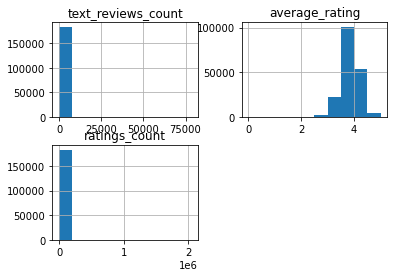

In [702]:
df[review_info].hist()

 A few books have a large number of text reviews and ratings, throwing off the histograms. Let's remove the highly skewed values and look at the plots again. 

{'whiskers': [<matplotlib.lines.Line2D at 0x12b13a190>,
 'caps': [<matplotlib.lines.Line2D at 0x12b13a430>,
 'boxes': [<matplotlib.lines.Line2D at 0x12b13a070>],
 'medians': [<matplotlib.lines.Line2D at 0x12b137310>],
 'fliers': [<matplotlib.lines.Line2D at 0x12b137490>],
 'means': []}

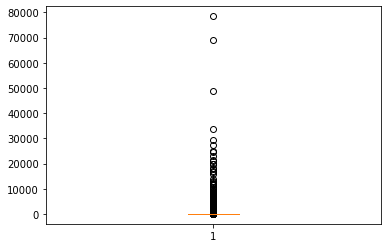

In [703]:
plt.boxplot(df.text_reviews_count)

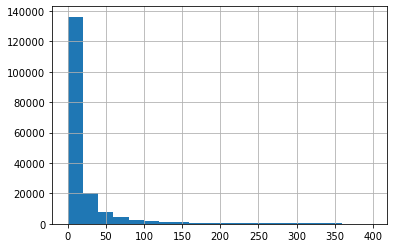

In [704]:
df.text_reviews_count.loc[df['text_reviews_count'] < 400].hist(bins=20)

{'whiskers': [<matplotlib.lines.Line2D at 0x12d0d5970>,
 'caps': [<matplotlib.lines.Line2D at 0x12d0d54f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x12d0d5a00>],
 'medians': [<matplotlib.lines.Line2D at 0x12d0be5b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x12d0be070>],
 'means': []}

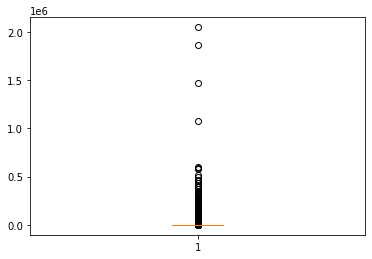

In [705]:
plt.boxplot(df.ratings_count)

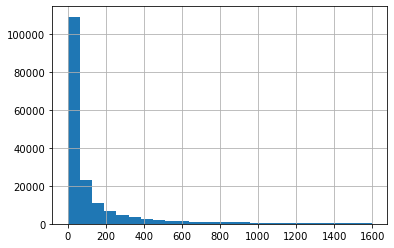

In [706]:
df.ratings_count.loc[df['ratings_count'] < 1600].hist(bins=25)

Most books have few reviews and ratings, with a few having almost outlier level numbers. May want to be careful in the weighting of # of reviews if the goal is to provide a wider variety of suggestions. 

Current plan for null values is to take the mean for text reviews count, average rating will be the avg. of the "similar books" column, and ratings count will be either 0 or an average. 

In [707]:
#Moving on to book information

In [708]:
df[book_info]

,format,is_ebook,series,num_pages
0,Hardcover,false,[169353],400
1,NaN,true,[1052227],318
2,NaN,true,[953679],NaN
3,Hardcover,false,[408775],NaN
5,Audio,false,[199039],NaN
...,...,...,...,...
219229,NaN,true,[1035852],NaN
219231,Paperback,false,[],208
219232,Paperback,false,[],288
219233,ebook,true,[],NaN


In [709]:
df.format.unique()

array(['Hardcover', nan, 'Audio', 'Paperback', 'Audiobook', 'Audio CD',
       'ebook', 'Audible Audio', 'Kindle Edition',
       'Mass Market Paperback', 'Unknown Binding', 'Library Binding',
       'Audio Cassette', 'CD-ROM', 'Leather Bound', 'MP3 CD',
       'Trade Paperback', 'mass market paperback', 'Proof',
       'ebook &amp; paperback', 'Sony Reader', 'Paperback - Large Print',
       'paper', 'Leatherbound', 'paperback', 'Soft Cover',
       'trade paperback', 'HARDCOVER', 'webtoon', 'hardback',
       'Tradepaperback', 'Unbound', 'Nook',
       'Mass Market Paperback - Reissue', 'softcover', 'Board Book',
       'Radio drama', 'Kindle, Paperback', 'large print', 'Large Print',
       'ebook&amp;paperback', 'Paperback and ebook', 'ebook, paperback',
       'Softcover', 'MP3 Audio', 'Digital Audio', 'Playaway',
       'true first ed HC, re-bound by library', 'audio', 'hardcover',
       'Graphic Novel', 'ARC', 'Kindle Edition, Paperback', 'Paper',
       'MP3 Book', 'Export Tra

In [710]:
df.format.nunique()

219

In [711]:
#Making all formats lower case
df.format = df.format.str.lower()

In [712]:
df.format.nunique()

186

In [713]:
df.format.unique()

array(['hardcover', nan, 'audio', 'paperback', 'audiobook', 'audio cd',
       'ebook', 'audible audio', 'kindle edition',
       'mass market paperback', 'unknown binding', 'library binding',
       'audio cassette', 'cd-rom', 'leather bound', 'mp3 cd',
       'trade paperback', 'proof', 'ebook &amp; paperback', 'sony reader',
       'paperback - large print', 'paper', 'leatherbound', 'soft cover',
       'webtoon', 'hardback', 'tradepaperback', 'unbound', 'nook',
       'mass market paperback - reissue', 'softcover', 'board book',
       'radio drama', 'kindle, paperback', 'large print',
       'ebook&amp;paperback', 'paperback and ebook', 'ebook, paperback',
       'mp3 audio', 'digital audio', 'playaway',
       'true first ed hc, re-bound by library', 'graphic novel', 'arc',
       'kindle edition, paperback', 'mp3 book', 'export trade paperback',
       'hard cover', 'online freebie', 'inbunden',
       'audio cassette - abridged', 'fictional novel', '10 compact discs',
       'c

In [714]:
df.dtypes

text_reviews_count        int64
series                   object
country_code             object
language_code            object
popular_shelves          object
is_ebook                 object
average_rating          float64
similar_books            object
format                   object
authors                  object
publisher                object
num_pages                object
publication_month        object
edition_information      object
publication_year         object
book_id                   int64
ratings_count             int64
work_id                   int64
title                    object
title_without_series     object
dtype: object

In [715]:
df.format.value_counts().head(20)

paperback                58259
hardcover                23816
ebook                    14979
kindle edition           12819
audio cd                  6669
mass market paperback     5079
audiobook                 3050
audible audio             2025
audio                     1828
unknown binding            518
audio cassette             233
mp3 cd                     193
trade paperback             96
library binding             92
nook                        56
hardback                    27
leather bound               25
large print                 16
digital audio               10
capa mole                    9
Name: format, dtype: int64

In [716]:
#Looking for duplicates due to paperback, hardcover, & audio separation 
df.title.value_counts()

The Adventures of Sherlock Holmes                                      93
Rebecca                                                                81
The Hound of the Baskervilles                                          71
The Woman in White                                                     68
And Then There Were None                                               67
                                                                       ..
The Girl Who Kicked the Hornets' Nest: Wiki content for your Kindle     1
Sunspot                                                                 1
Tenth Justice                                                           1
The Hanged Man: A Tarot Card Mystery                                    1
The Beggar's Opera (Inspector Ramírez, #1)                              1
Name: title, Length: 107563, dtype: int64

In [717]:
df.title_without_series.value_counts()

The Adventures of Sherlock Holmes                                      93
Rebecca                                                                81
The Hound of the Baskervilles                                          71
The Woman in White                                                     68
And Then There Were None                                               67
                                                                       ..
The Girl Who Kicked the Hornets' Nest: Wiki content for your Kindle     1
Sunspot                                                                 1
Tenth Justice                                                           1
The Hanged Man: A Tarot Card Mystery                                    1
The Beggar's Opera (Inspector Ramírez, #1)                              1
Name: title_without_series, Length: 107563, dtype: int64

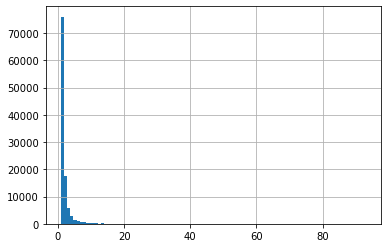

In [718]:
df.title.value_counts().hist(bins=100)

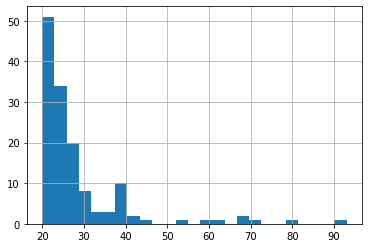

In [719]:
#Looking at books with value_counts > 20
df.title.value_counts().loc[df.title.value_counts() >= 20].hist(bins=25)

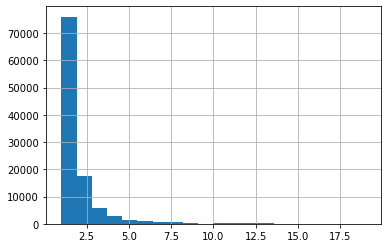

In [720]:
df.title.value_counts().loc[df.title.value_counts() < 20].hist(bins=20)

In [721]:
df.title.value_counts().loc[df.title.value_counts() > 1].sum()

106887

In [722]:
df.title.value_counts().loc[df.title.value_counts() > 1].unique()

array([93, 81, 71, 68, 67, 61, 60, 53, 44, 43, 41, 40, 39, 38, 37, 36, 35,
       32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16,
       15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2])

In [723]:
df.title.value_counts().loc[df.title.value_counts() > 1].nunique()

48

Only 48 books have duplicate titles. 

In [724]:
df.title.value_counts().loc[df.title.value_counts() > 1]

The Adventures of Sherlock Holmes                       93
Rebecca                                                 81
The Hound of the Baskervilles                           71
The Woman in White                                      68
And Then There Were None                                67
                                                        ..
Ash (Asher Benson #1)                                    2
Killer's Payoff (87th Precinct #6)                       2
Detective Camp (A to Z Mysteries: Super Edition, #1)     2
Buried Dreams: Inside the Mind of a Serial Killer        2
The Curse of Crow Hollow                                 2
Name: title, Length: 31543, dtype: int64

In [725]:
df.loc[df.duplicated(subset=['title'])]

,text_reviews_count,series,country_code,language_code,popular_shelves,is_ebook,average_rating,similar_books,format,authors,publisher,num_pages,publication_month,edition_information,publication_year,book_id,ratings_count,work_id,title,title_without_series
99,28,[],US,NaN,"[{'count': '95', 'name': 'to-read'}, {'count':...",true,3.57,"[6650065, 394154, 12398221, 232396, 4945903, 6...",ebook,"[{'author_id': '822613', 'role': ''}]",Maclehose Press Quercus,NaN,11,NaN,2017,35593693,50,48544183,Three Days and a Life,Three Days and a Life
379,32,[],US,eng,"[{'count': '1878', 'name': 'non-fiction'}, {'c...",false,4.00,"[333907, 487445, 231585, 691023, 135892, 75076...",NaN,"[{'author_id': '28828', 'role': ''}, {'author_...",W.W. Norton & Company,736,NaN,25th Anniversary Edition,NaN,907604,196,1077715,Helter Skelter: The True Story of the Manson M...,Helter Skelter: The True Story of the Manson M...
465,2,[189322],US,eng,"[{'count': '451', 'name': 'to-read'}, {'count'...",false,3.92,"[7924829, 10808013, 6353455, 522367, 6332280, ...",audio cd,"[{'author_id': '5922', 'role': ''}, {'author_i...",NaN,NaN,NaN,NaN,NaN,8939980,2,13063448,"Bad Boy (Inspector Banks, #19)","Bad Boy (Inspector Banks, #19)"
593,5,[144847],US,NaN,"[{'count': '8094', 'name': 'to-read'}, {'count...",false,4.04,"[70087, 34993, 109510, 3224566, 177193, 957374...",hardcover,"[{'author_id': '5293', 'role': ''}]",NaN,0,3,NaN,1992,993217,17,31538,"The Bourne Ultimatum (Jason Bourne, #3)","The Bourne Ultimatum (Jason Bourne, #3)"
649,1,[169353],US,eng,"[{'count': '159', 'name': 'to-read'}, {'count'...",false,3.93,"[439108, 522621, 116770, 1275927, 6202655, 840...",audiobook,"[{'author_id': '37778', 'role': 'author'}]",Whole Story Audiobooks,NaN,11,NaN,2009,13076084,3,6243149,"Crowner Royal (Crowner John Mystery, #13)","Crowner Royal (Crowner John Mystery, #13)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219221,1,[],US,NaN,"[{'count': '231', 'name': 'to-read'}, {'count'...",false,3.78,"[1207540, 1118874, 1098095, 876822, 1458480, 8...",NaN,"[{'author_id': '39467', 'role': ''}]",NaN,NaN,NaN,NaN,NaN,2247090,7,775122,Black Heart,Black Heart
219222,2,[789875],US,eng,"[{'count': '443', 'name': 'to-read'}, {'count'...",false,4.09,[],hardcover,"[{'author_id': '7011369', 'role': ''}]",Quercus Publishing Ltd,416,9,NaN,2015,27637705,9,44871703,"Blood and Bone (Alice Madison, #3)","Blood and Bone (Alice Madison, #3)"
219225,21,[],US,eng,"[{'count': '574', 'name': 'to-read'}, {'count'...",true,4.32,"[27391087, 25253442, 23441596, 28182084, 27255...",NaN,"[{'author_id': '13786119', 'role': ''}]",NaN,526,NaN,NaN,NaN,25308738,31,45039224,The SHIVA Syndrome,The SHIVA Syndrome
219227,4,[],US,eng,"[{'count': '604', 'name': 'to-read'}, {'count'...",true,4.24,[],kindle edition,"[{'author_id': '7741497', 'role': ''}, {'autho...",Chromatic Press,219,9,NaN,2014,23363286,15,42919549,Dead Endings,Dead Endings


In [726]:
df[df['title'].str.contains("The Adventures of Sherlock Holmes")]

,text_reviews_count,series,country_code,language_code,popular_shelves,is_ebook,average_rating,similar_books,format,authors,publisher,num_pages,publication_month,edition_information,publication_year,book_id,ratings_count,work_id,title,title_without_series
1478,1,"[185867, 381924]",US,NaN,"[{'count': '15025', 'name': 'to-read'}, {'coun...",false,4.30,"[184594, 359251, 1474865, 192887, 141270, 5675...",paperback,"[{'author_id': '2448', 'role': ''}]",Tribeca Books,236,7,NaN,2011,12639858,29,1222101,The Adventures of Sherlock Holmes,The Adventures of Sherlock Holmes
1654,1,"[185867, 381924]",US,eng,"[{'count': '15025', 'name': 'to-read'}, {'coun...",false,4.30,"[184594, 359251, 1474865, 192887, 141270, 5675...",paperback,"[{'author_id': '2448', 'role': ''}]",Penguin Group,302,NaN,NaN,1994,24564118,1,1222101,The Adventures of Sherlock Holmes,The Adventures of Sherlock Holmes
2827,2,"[185867, 381924]",US,NaN,"[{'count': '15025', 'name': 'to-read'}, {'coun...",false,4.30,"[184594, 359251, 1474865, 192887, 141270, 5675...",audio,"[{'author_id': '2448', 'role': ''}, {'author_i...",Blackstone Audiobooks,10,12,NaN,1980,11196320,6,1222101,The Adventures of Sherlock Holmes,The Adventures of Sherlock Holmes
4358,60,"[1042242, 381922]",US,NaN,"[{'count': '1342', 'name': 'to-read'}, {'count...",false,3.85,"[7544946, 909870, 6691895, 12959148, 23475666,...",paperback,"[{'author_id': '2448', 'role': ''}, {'author_i...",Kessinger Publishing,48,12,NaN,2005,6943892,1389,7177245,The Adventure of the Beryl Coronet (The Advent...,The Adventure of the Beryl Coronet (The Advent...
4876,1,[745678],US,NaN,"[{'count': '227', 'name': 'to-read'}, {'count'...",true,4.24,"[1561597, 6431104, 6696924, 3010030, 920651, 3...",NaN,"[{'author_id': '2448', 'role': ''}]",NaN,NaN,NaN,NaN,NaN,35059873,2,32923877,Arthur Conan Doyle: The Adventures of Sherlock...,Arthur Conan Doyle: The Adventures of Sherlock...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215762,16,"[185867, 381924]",US,NaN,"[{'count': '15176', 'name': 'to-read'}, {'coun...",false,4.30,"[184594, 359251, 1474865, 192887, 141270, 5675...",mass market paperback,"[{'author_id': '2448', 'role': ''}, {'author_i...",Wordsworth Editions,NaN,NaN,Wordsworth Classics,NaN,962730,597,1222101,The Adventures of Sherlock Holmes,The Adventures of Sherlock Holmes
215960,7,[745781],US,NaN,"[{'count': '109', 'name': 'currently-reading'}...",false,4.48,[],audio cd,"[{'author_id': '2448', 'role': ''}, {'author_i...",Naxos Audiobooks,0,2,NaN,2005,76243,43,21482542,"The Adventures of Sherlock Holmes, Vols 1-6","The Adventures of Sherlock Holmes, Vols 1-6"
216362,7,"[185867, 381924]",US,eng,"[{'count': '15176', 'name': 'to-read'}, {'coun...",true,4.30,"[184594, 359251, 1474865, 192887, 141270, 5675...",NaN,"[{'author_id': '2448', 'role': ''}]",Arthur Conan Doyle,NaN,NaN,NaN,NaN,22620243,1488,1222101,The Adventures of Sherlock Holmes,The Adventures of Sherlock Holmes
217873,5,"[185867, 381924]",US,eng,"[{'count': '15525', 'name': 'to-read'}, {'coun...",false,4.30,"[184594, 359251, 1474865, 192887, 141270, 5675...",paperback,"[{'author_id': '2448', 'role': ''}]",Wordsworth Classics,450,NaN,NaN,1992,13635969,29,1222101,The Adventures of Sherlock Holmes,The Adventures of Sherlock Holmes


Keeping duplicates for now due to differences in pulbihers, format, page number, reviews, ratings, years, etc. If publisher does not deem important during EDA, merging is a possibility.

In [727]:
#Back to formats

df.format.value_counts().head(20)

paperback                58259
hardcover                23816
ebook                    14979
kindle edition           12819
audio cd                  6669
mass market paperback     5079
audiobook                 3050
audible audio             2025
audio                     1828
unknown binding            518
audio cassette             233
mp3 cd                     193
trade paperback             96
library binding             92
nook                        56
hardback                    27
leather bound               25
large print                 16
digital audio               10
capa mole                    9
Name: format, dtype: int64

Keeping formats: paperback, hardcover, ebook, kindle, audio, audible, unknown, and multiple

like formats will be rolled into main list (ie hardback --> hardcover)

cassette alone will be dropped due to technological challenges actually listening to that version.

pb = ['paperback','trade paperback', 'paper','softcover','mass market paperback', 'soft cover','paperback manga']
hc = ['hardcover','hardback','hard cover','hardcover, book club edition']
au = ['audio','audio cd','mp3','mp3 cd','digital audio', 'mp3 book','eaudiobook','audio book']
eb = ['ebook','nook']
kindle = ['kindle edition','kindle']
audible = ['audible audio','audible, usa download']
podiobook = ['podiobook']

large = ['large print','hardcover - large print','softcover - large print','paperback - large print']
allformats = df.format.unique()

drop = ['cassette']

In [728]:
#df.format.loc[df.format.isin(pb)] = 'paperback'

In [729]:
#df.format.loc[df.format.isin(hc)] = 'hardcover'

In [730]:
#df.format.loc[df.format.isin(au)] = 'audiobook'

In [731]:
#df.format.loc[df.format.isin(eb)] = 'ebook'

In [732]:
#df.format.loc[df.format.isin(podiobook)] = 'podiobook'

In [733]:
#df.format.loc[df.format.isin(large)] = 'large_print'

In [734]:
#df.format.value_counts().head(20)

In [735]:
#df.format.loc[df['format'].str.contains("and",na=False)] = 'multiple'

In [736]:
#df.format.value_counts().head(20)

In [737]:
#df.format.loc[df['format'].str.contains(",",na=False)] = 'multiple'

In [738]:
#df.format.value_counts().head(20)

In [739]:
#df.format.value_counts().head(30)

In [740]:
#df.format.loc[df['format'].str.contains("online",na=False)] = 'ebook'


In [741]:
#df.format.loc[df['format'].str.contains("online",na=False)] = 'ebook'

In [742]:
#df.format.loc[df['format'].str.contains("audio",na=False)].value_counts()

In [743]:
#df.format.loc[df['format'].str.contains("hard",na=False)].value_counts()

In [744]:
def find_formats(dataframe,col,strings):
    res = dataframe[col].loc[dataframe[col].str.contains(strings,na=False)].value_counts()
    print(strings,'results are:\n',res)
    

In [745]:
def change_formats(dataframe,col,strings,new_name):
    dataframe[col].loc[dataframe[col].str.contains(strings,na=False)] = new_name
    dataframe[col].loc[dataframe[col].str.contains(strings,na=False)].value_counts()

In [746]:
find_formats(df,"format","large")

large results are:
 large print                16
paperback - large print     3
hardcover - large print     3
hardcover (large print)     2
large print hardcover       1
large print paperback       1
Name: format, dtype: int64


In [747]:
change_formats(df,"format","large","large_print")

/Users/jensensj/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [748]:
find_formats(df,"format","large")

large results are:
 large_print    26
Name: format, dtype: int64


In [749]:
find_formats(df,"format","lp")
change_formats(df,"format","lp","large_print")

lp results are:
 hardcover-lp    2
Name: format, dtype: int64


In [750]:
find_formats(df,"format","hard")

hard results are:
 hardcover                       23816
hardback                           27
hard cover                          3
hardover                            1
original uk hardback                1
limited edition hardcover           1
faux leather hardcover              1
hardcover, book club edition        1
Name: format, dtype: int64


In [751]:
change_formats(df,"format","hard","hardcover")

In [752]:
find_formats(df,"format","and")

and results are:
 paperback and ebook             4
kindle edition and paperback    4
paperback and kindle            3
ebook and paperback             3
crime and investigation         1
paperback and e-book            1
kindle and paperback            1
print and ebook                 1
ebook and trade paperback       1
print and download              1
ebook and print                 1
Name: format, dtype: int64


In [753]:
change_formats(df,"format","and","multiple")

In [754]:
find_formats(df,"format","/")

/ results are:
 paperback/kindle       1
print/kindle           1
podcast/podiobooks     1
kindle/paperback       1
podcast / audiobook    1
Name: format, dtype: int64


In [755]:
change_formats(df,"format","/","multiple")

In [756]:
find_formats(df,"format",";")

; results are:
 ebook &amp; paperback              2
paperback; digital (epub, mobi)    1
paperback &amp; pdf                1
e-book &amp; paperback             1
ebook&amp;paperback                1
electronic &amp; print             1
paperback &amp; kindle             1
Name: format, dtype: int64


In [757]:
change_formats(df,"format",";","multiple")

In [758]:
find_formats(df,"format",",")

, results are:
 paperback, ebook                         4
ebook, paperback                         2
kindle edition, paperback                1
paperback, e-book                        1
audible, usa download                    1
ebook, kindle                            1
ebook, print                             1
ebook, paperback, audible audio          1
kindle, paperback                        1
paperback, kindle                        1
paperback, ebook, audible                1
true first ed hc, re-bound by library    1
Name: format, dtype: int64


In [759]:
change_formats(df,"format","audible, usa","audible")
change_formats(df,"format","true first ed hc, re-bound by library","unknown_other")

In [760]:
find_formats(df,"format",",")

, results are:
 paperback, ebook                   4
ebook, paperback                   2
kindle edition, paperback          1
paperback, e-book                  1
ebook, kindle                      1
ebook, print                       1
ebook, paperback, audible audio    1
kindle, paperback                  1
paperback, kindle                  1
paperback, ebook, audible          1
Name: format, dtype: int64


In [761]:
change_formats(df,"format",",","multiple")

In [762]:
find_formats(df,"format","paper")

paper results are:
 paperback                          58259
mass market paperback               5079
trade paperback                       96
paper                                  6
paperback manga                        4
perfect paperback                      2
uk paperback                           2
tradepaperback                         2
(paperback)                            1
mass-market paperback                  1
bookpaper                              1
export trade paperback                 1
boxed set (paperback)                  1
pocket paperback                       1
trade paper back                       1
trade paperbck                         1
paperback - c format                   1
mass market paperback - reissue        1
open market paperback                  1
Name: format, dtype: int64


In [763]:
change_formats(df,"format","paper","softcover")

In [764]:
find_formats(df,"format","soft")

soft results are:
 softcover     63468
soft cover        4
Name: format, dtype: int64


In [765]:
change_formats(df,"format","soft","softcover")

In [766]:
find_formats(df,"format","audible")

audible results are:
 audible audio                   2025
mp3 audible                        1
audible                            1
audible mp3 download               1
audiobook - audible download       1
Name: format, dtype: int64


In [767]:
change_formats(df,"format","audible","audible")

In [768]:
find_formats(df,"format","kindle")

kindle results are:
 kindle edition            12819
kindle                        3
ebook (version kindle)        1
kindle ebook                  1
Name: format, dtype: int64


In [769]:
change_formats(df,"format","kindle","kindle")

In [770]:
find_formats(df,"format","eb")

eb results are:
 ebook               14979
web serial novel        1
online freebie          1
webtoon                 1
Name: format, dtype: int64


In [771]:
find_formats(df,"format","online")

online results are:
 online fiction               2
online post                  1
free online fiction          1
online publication           1
online                       1
online fiction - complete    1
online freebie               1
original online fiction      1
Name: format, dtype: int64


In [772]:
find_formats(df,"format","nook")

nook results are:
 nook    56
Name: format, dtype: int64


In [773]:
change_formats(df,"format","eb","ebook")
change_formats(df,"format","online","ebook")
change_formats(df,"format","nook","ebook")

In [774]:
find_formats(df,"format","cassette")

cassette results are:
 audio cassette                     233
audiocassette                        2
audio cassette (libr.) (unabr.)      1
audiocassette (unabridged)           1
audio cassette - abridged            1
audio cassette - unabridged          1
Name: format, dtype: int64


In [775]:
change_formats(df,"format","cassette","cassette")

In [776]:
find_formats(df,"format","audio")

audio results are:
 audio cd                          6669
audiobook                         3050
audio                             1828
digital audio                       10
eaudiobook                           3
digital audio (unabridged)           2
audio book                           2
abriged audio cd                     1
audio playaway                       1
unabriged audio cd                   1
playaway audio                       1
audiobook unabridged                 1
mp3 audio download                   1
mp3 audiobook                        1
mp3 audio                            1
preloaded digital audio player       1
audio cd (unabr.)                    1
Name: format, dtype: int64


In [777]:
change_formats(df,"format","audio","audio")

In [778]:
df.format.value_counts().head(20)

softcover            63472
hardcover            23851
ebook                15046
kindle               12824
audio                11574
audible               2029
unknown binding        518
cassette               239
mp3 cd                 193
library binding         92
multiple                48
large_print             28
leather bound           25
capa mole                9
unbound                  8
leatherette bound        7
podiobook                5
mp3 book                 5
cloth                    4
board book               4
Name: format, dtype: int64

In [779]:
find_formats(df,"format","mp3")

mp3 results are:
 mp3 cd          193
mp3 book          5
mp3               2
mp3 download      1
Name: format, dtype: int64


In [780]:
change_formats(df,"format","mp3","audio")

In [781]:
find_formats(df,"format","binding")

binding results are:
 unknown binding            518
library binding             92
textbook binding             1
abriged unknown binding      1
Name: format, dtype: int64


In [782]:
change_formats(df,"format","binding","unknown_other")

In [783]:
df.format.value_counts().head(20)

softcover            63472
hardcover            23851
ebook                15046
kindle               12824
audio                11775
audible               2029
unknown_other          613
cassette               239
multiple                48
large_print             28
leather bound           25
capa mole                9
unbound                  8
leatherette bound        7
podiobook                5
cloth                    4
board book               4
playaway                 3
leatherbound             3
broche                   3
Name: format, dtype: int64

In [784]:
find_formats(df,"format","leather")

leather results are:
 leather bound        25
leatherette bound     7
leatherbound          3
Name: format, dtype: int64


In [785]:
change_formats(df,"format","leather","unknown_other")

In [786]:
df.format.value_counts().head(10)

softcover        63472
hardcover        23851
ebook            15046
kindle           12824
audio            11775
audible           2029
unknown_other      648
cassette           239
multiple            48
large_print         28
Name: format, dtype: int64

In [787]:
find_formats(df,"format","dig")

dig results are:
 preloaded digital player    2
digital chapbook            1
adobe digital edition       1
Name: format, dtype: int64


In [788]:
change_formats(df,"format","dig","audio")

In [789]:
find_formats(df,"format","pod")

pod results are:
 podiobook     5
podcast       2
podio book    1
Name: format, dtype: int64


In [790]:
change_formats(df,"format","pod","podiobook")

In [791]:
df.format.value_counts().head(20)

softcover        63472
hardcover        23851
ebook            15046
kindle           12824
audio            11779
audible           2029
unknown_other      648
cassette           239
multiple            48
large_print         28
capa mole            9
unbound              8
podiobook            8
board book           4
cloth                4
broche               3
inbunden             3
playaway             3
box set              3
graphic novel        2
Name: format, dtype: int64

In [792]:
main_formats = ['softcover', 'hardcover', 'ebook', 'kindle', 'audio', 'audible', 'unknown_other', 'multiple', 'large_print','podiobook']


In [793]:
df.format.unique()

array(['hardcover', nan, 'audio', 'softcover', 'ebook', 'audible',
       'kindle', 'unknown_other', 'cassette', 'cd-rom', 'proof',
       'multiple', 'sony reader', 'large_print', 'unbound', 'board book',
       'radio drama', 'playaway', 'graphic novel', 'arc', 'inbunden',
       'fictional novel', '10 compact discs', 'chapbook',
       'multiple formats', 'capa mole', 'poche', 'capa dura',
       'periodical', 'comic book', 'podiobook', 'book', 'pb', 'diskette',
       'novelty book', 'seeds of civilization', 'mira', 'epub', 'pdb',
       'ibook', 'vook', 'box set', 'comic', 's', 'cloth',
       'capa mole (livro de bolso)', 'mass-market', 'library edition',
       'part-in-omnibus', 'vhs tape', 'cd', 'kindel edition',
       'livro de bolso', 'uncorrected proof', "advance reader's copy",
       'kobo', 'pocket book', 'mobi', 'mystery', 'advance review copy',
       'broche', 'internet platform', 'print', 'harcover', 'mass market',
       'tankobon', 'unknown'], dtype=object)

In [794]:
change_formats(df,"format","pb","podiobook")
change_formats(df,"format","pdb","podiobook")

In [795]:
#changing all outdated technology to cassette to drop 
change_formats(df,"format","diskette","cassette")
change_formats(df,"format","vhs tape","cassette")

In [796]:
change_formats(df,"format","internet platform","ebook")
change_formats(df,"format","ibook","ebook")

In [797]:
change_formats(df,"format","harcover","hardcover")

In [798]:
change_formats(df,"format","pocket book","softcover")
change_formats(df,"format","mass market","softcover")
change_formats(df,"format","mass-market","softcover")

In [799]:
change_formats(df,"format","cd","audiobook")
change_formats(df,"format","compact","audiobook")

In [800]:
change_formats(df,"format","kindel","kindle")

In [801]:
df.format.unique()

array(['hardcover', nan, 'audio', 'softcover', 'ebook', 'audible',
       'kindle', 'unknown_other', 'cassette', 'audiobook', 'proof',
       'multiple', 'sony reader', 'large_print', 'unbound', 'board book',
       'radio drama', 'playaway', 'graphic novel', 'arc', 'inbunden',
       'fictional novel', 'podiobook', 'multiple formats', 'capa mole',
       'poche', 'capa dura', 'periodical', 'comic book', 'book',
       'novelty book', 'seeds of civilization', 'mira', 'epub', 'vook',
       'box set', 'comic', 's', 'cloth', 'capa mole (livro de bolso)',
       'library edition', 'part-in-omnibus', 'livro de bolso',
       'uncorrected proof', "advance reader's copy", 'kobo', 'mobi',
       'mystery', 'advance review copy', 'broche', 'print', 'tankobon',
       'unknown'], dtype=object)

In [802]:
change_formats(df,"format","multiple","multiple")

In [803]:
change_formats(df,"format","unknown","unknown_other")

In [804]:
change_formats(df,"format","audiobook","audio")

In [805]:
df.format.value_counts()

softcover                     63475
hardcover                     23852
ebook                         15048
kindle                        12825
audio                         11783
audible                        2029
unknown_other                   649
cassette                        241
multiple                         49
large_print                      28
podiobook                        12
capa mole                         9
unbound                           8
cloth                             4
board book                        4
playaway                          3
inbunden                          3
broche                            3
box set                           3
graphic novel                     2
poche                             2
kobo                              1
vook                              1
tankobon                          1
livro de bolso                    1
capa dura                         1
mystery                           1
radio drama                 

In [806]:
#Dropping cassette and other outdated technology
df[df.format.isin(main_formats)]

,text_reviews_count,series,country_code,language_code,popular_shelves,is_ebook,average_rating,similar_books,format,authors,publisher,num_pages,publication_month,edition_information,publication_year,book_id,ratings_count,work_id,title,title_without_series
0,15,[169353],US,NaN,"[{'count': '159', 'name': 'to-read'}, {'count'...",false,3.93,"[439108, 522621, 116770, 1275927, 6202655, 840...",hardcover,"[{'author_id': '37778', 'role': ''}]",Simon & Schuster UK,400,4,NaN,2009,6066814,186,6243149,"Crowner Royal (Crowner John Mystery, #13)","Crowner Royal (Crowner John Mystery, #13)"
3,8,[408775],US,NaN,"[{'count': '51', 'name': 'to-read'}, {'count':...",false,3.30,[],hardcover,"[{'author_id': '190988', 'role': ''}]",Ulverscroft,NaN,12,Large Print,1975,1902202,52,1903897,"Dead in the Morning (Patrick Grant, #1)","Dead in the Morning (Patrick Grant, #1)"
5,3,[199039],US,eng,"[{'count': '1694', 'name': 'mystery'}, {'count...",false,3.96,"[93575, 280849, 243401, 77617]",audio,"[{'author_id': '123715', 'role': ''}, {'author...",HarperAudio,NaN,3,NaN,2013,16158998,5,2288775,A Murder is Announced,A Murder is Announced
7,8,[326237],US,NaN,"[{'count': '38', 'name': 'to-read'}, {'count':...",false,3.61,[],softcover,"[{'author_id': '1533165', 'role': ''}]",Orion,320,8,NaN,2001,2805495,58,2831381,Wycliffe and the Cycle of Death,Wycliffe and the Cycle of Death
8,6,[],US,eng,"[{'count': '171', 'name': 'to-read'}, {'count'...",false,4.14,[],softcover,"[{'author_id': '4577517', 'role': ''}]",280 Steps,228,11,NaN,2014,22722787,18,42251489,The Cost of Doing Business,The Cost of Doing Business
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219228,6,[678804],US,NaN,"[{'count': '21', 'name': 'to-read'}, {'count':...",true,4.04,[],kindle,"[{'author_id': '6877250', 'role': ''}]",NaN,233,10,NaN,2014,23124272,75,42672906,"Stacked to Death (Jamie Brodie Mystery, #7)","Stacked to Death (Jamie Brodie Mystery, #7)"
219231,6,[],US,NaN,"[{'count': '497', 'name': 'to-read'}, {'count'...",false,3.81,"[23012660, 13763625, 18079894, 21432940, 17343...",softcover,"[{'author_id': '16176417', 'role': ''}]",MX Publishing,208,10,NaN,2015,26591045,16,46613239,The Sensible Necktie and Other Stories of Sher...,The Sensible Necktie and Other Stories of Sher...
219232,3,[],US,eng,"[{'count': '735', 'name': 'to-read'}, {'count'...",false,4.11,"[24808217, 17620517, 13496536, 21947925, 18079...",softcover,"[{'author_id': '5401342', 'role': ''}]",MX Publishing,288,7,NaN,2015,25727303,6,45563843,Mrs. Hudson in New York,Mrs. Hudson in New York
219233,7,[],US,eng,"[{'count': '36', 'name': 'to-read'}, {'count':...",true,4.00,[],ebook,"[{'author_id': '4590885', 'role': ''}]",NaN,NaN,9,NaN,2014,23252156,16,42794368,Wicked Reflection,Wicked Reflection


In [807]:
df.format = df.format.fillna('unknown_other')

In [808]:
df.format.value_counts()

softcover                     63475
unknown_other                 53496
hardcover                     23852
ebook                         15048
kindle                        12825
audio                         11783
audible                        2029
cassette                        241
multiple                         49
large_print                      28
podiobook                        12
capa mole                         9
unbound                           8
cloth                             4
board book                        4
playaway                          3
inbunden                          3
broche                            3
box set                           3
graphic novel                     2
poche                             2
kobo                              1
vook                              1
tankobon                          1
livro de bolso                    1
capa dura                         1
mystery                           1
radio drama                 

In [809]:
df.format[df.format.isin(main_formats)].value_counts()

softcover        63475
unknown_other    53496
hardcover        23852
ebook            15048
kindle           12825
audio            11783
audible           2029
multiple            49
large_print         28
podiobook           12
Name: format, dtype: int64

In [810]:
df.format = df.format[df.format.isin(main_formats)]

In [811]:
df.format.value_counts()

softcover        63475
unknown_other    53496
hardcover        23852
ebook            15048
kindle           12825
audio            11783
audible           2029
multiple            49
large_print         28
podiobook           12
Name: format, dtype: int64

In [812]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182907 entries, 0 to 219234
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   text_reviews_count    182907 non-null  int64  
 1   series                182907 non-null  object 
 2   country_code          182907 non-null  object 
 3   language_code         100456 non-null  object 
 4   popular_shelves       182907 non-null  object 
 5   is_ebook              182907 non-null  object 
 6   average_rating        182907 non-null  float64
 7   similar_books         182907 non-null  object 
 8   format                182597 non-null  object 
 9   authors               182907 non-null  object 
 10  publisher             128492 non-null  object 
 11  num_pages             117646 non-null  object 
 12  publication_month     121286 non-null  object 
 13  edition_information   15389 non-null   object 
 14  publication_year      132323 non-null  object 
 15  

In [813]:
df.head()

,text_reviews_count,series,country_code,language_code,popular_shelves,is_ebook,average_rating,similar_books,format,authors,publisher,num_pages,publication_month,edition_information,publication_year,book_id,ratings_count,work_id,title,title_without_series
0,15,[169353],US,NaN,"[{'count': '159', 'name': 'to-read'}, {'count'...",false,3.93,"[439108, 522621, 116770, 1275927, 6202655, 840...",hardcover,"[{'author_id': '37778', 'role': ''}]",Simon & Schuster UK,400,4,NaN,2009,6066814,186,6243149,"Crowner Royal (Crowner John Mystery, #13)","Crowner Royal (Crowner John Mystery, #13)"
1,60,[1052227],US,eng,"[{'count': '54', 'name': 'currently-reading'},...",true,4.33,[],unknown_other,"[{'author_id': '242185', 'role': ''}]",NaN,318,NaN,NaN,NaN,33394837,269,54143148,The House of Memory (Pluto's Snitch #2),The House of Memory (Pluto's Snitch #2)
2,23,[953679],US,eng,"[{'count': '90', 'name': 'to-read'}, {'count':...",true,3.49,[],unknown_other,"[{'author_id': '15104629', 'role': ''}, {'auth...",Amazon Digital Services,NaN,NaN,NaN,NaN,29074697,192,49305010,The Slaughtered Virgin of Zenopolis (Inspector...,The Slaughtered Virgin of Zenopolis (Inspector...
3,8,[408775],US,NaN,"[{'count': '51', 'name': 'to-read'}, {'count':...",false,3.30,[],hardcover,"[{'author_id': '190988', 'role': ''}]",Ulverscroft,NaN,12,Large Print,1975,1902202,52,1903897,"Dead in the Morning (Patrick Grant, #1)","Dead in the Morning (Patrick Grant, #1)"
5,3,[199039],US,eng,"[{'count': '1694', 'name': 'mystery'}, {'count...",false,3.96,"[93575, 280849, 243401, 77617]",audio,"[{'author_id': '123715', 'role': ''}, {'author...",HarperAudio,NaN,3,NaN,2013,16158998,5,2288775,A Murder is Announced,A Murder is Announced


In [814]:
df.format[df['is_ebook'].str.contains('true') & df['format'].str.contains('unknown')] = 'ebook'

<ipython-input-814-8ceff1ceeed7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.format[df['is_ebook'].str.contains('true') & df['format'].str.contains('unknown')] = 'ebook'


In [815]:
df[df['is_ebook'].str.contains('false')& df['format'].str.contains('ebook')]

,text_reviews_count,series,country_code,language_code,popular_shelves,is_ebook,average_rating,similar_books,format,authors,publisher,num_pages,publication_month,edition_information,publication_year,book_id,ratings_count,work_id,title,title_without_series
7658,6,[],US,eng,"[{'count': '13', 'name': 'to-read'}, {'count':...",false,4.56,[],ebook,"[{'author_id': '14552980', 'role': ''}, {'auth...",NaN,NaN,NaN,NaN,2015,33987008,38,47299893,Bastard,Bastard
27595,27,[1014467],US,NaN,"[{'count': '114', 'name': 'to-read'}, {'count'...",false,3.82,[],ebook,"[{'author_id': '8037520', 'role': ''}]",NaN,30,9,NaN,2016,34039846,158,55043726,"Fatal Reaction (Curl Up and Dye Mysteries, #0.5)","Fatal Reaction (Curl Up and Dye Mysteries, #0.5)"
71755,55,[],US,eng,"[{'count': '231', 'name': 'to-read'}, {'count'...",false,3.62,"[18478997, 17340536, 28098281, 11437369, 17413...",ebook,"[{'author_id': '6984726', 'role': ''}]",reddit,2,6,NaN,2011,28107695,186,48114686,Cologne,Cologne
77500,1,[],US,eng,"[{'count': '13', 'name': 'to-read'}, {'count':...",false,3.63,[],ebook,"[{'author_id': '5621935', 'role': ''}]",NaN,NaN,NaN,NaN,2014,24925157,1,25685308,Going Gray,Going Gray
105231,59,[],US,eng,"[{'count': '718', 'name': 'to-read'}, {'count'...",false,3.71,"[6856865, 94984, 263464, 6867962, 11022544, 10...",ebook,"[{'author_id': '24827', 'role': ''}]",NaN,239,NaN,NaN,2007,2590477,822,2610066,Plague Zone,Plague Zone
105317,88,[],US,eng,"[{'count': '1409', 'name': 'to-read'}, {'count...",false,4.08,"[13484064, 22598022, 18109544, 25111205, 12388...",ebook,"[{'author_id': '6455353', 'role': ''}]",adult-fanfiction.org,800,3,NaN,2014,15784986,524,21503114,Waiting in the Throes,Waiting in the Throes
124637,131,[],US,eng,"[{'count': '1704', 'name': 'to-read'}, {'count...",false,4.14,"[18403506, 15834395, 7812058, 10506860, 120722...",ebook,"[{'author_id': '5781497', 'role': ''}]",Fictionpress,502,7,Free,2014,18488996,755,26171416,Control,Control
128019,26,[],US,eng,"[{'count': '65', 'name': 'to-read'}, {'count':...",false,3.28,[],ebook,"[{'author_id': '6553431', 'role': ''}]",Author,42,NaN,NaN,NaN,18666338,43,26490450,Object D'Art,Object D'Art
131595,7,[347754],US,eng,"[{'count': '33', 'name': 'to-read'}, {'count':...",false,3.95,[],ebook,"[{'author_id': '332067', 'role': ''}, {'author...",FictionPress,26,8,NaN,2009,13497680,76,19042056,"Just Drive The Car (Just Drive The Car, #1)","Just Drive The Car (Just Drive The Car, #1)"
179735,7,[],US,eng,"[{'count': '68', 'name': 'to-read'}, {'count':...",false,3.80,[],ebook,"[{'author_id': '4817434', 'role': ''}]",FictionPress,263,6,NaN,2009,11225687,55,16151537,Fiend By the Bay,Fiend By the Bay


In [816]:
df[df['is_ebook'].str.contains('false')& df['format'].str.contains('ebook')].count()

text_reviews_count      13
series                  13
country_code            13
language_code           12
popular_shelves         13
is_ebook                13
average_rating          13
similar_books           13
format                  13
authors                 13
publisher                9
num_pages               11
publication_month        8
edition_information      1
publication_year        11
book_id                 13
ratings_count           13
work_id                 13
title                   13
title_without_series    13
dtype: int64

In [817]:
index_names = df[df['is_ebook'].str.contains('false')& df['format'].str.contains('ebook')].index

In [818]:
#df.drop(index_names, inplace = True)

In [819]:
#df.info()

Filled those unknowns with ebook = "true" as ebook, leaving contradictory for now as my ebook defnition includes online books. 

## Now we start addressing missing values

In [820]:
df.isnull().sum()

text_reviews_count           0
series                       0
country_code                 0
language_code            82451
popular_shelves              0
is_ebook                     0
average_rating               0
similar_books                0
format                     310
authors                      0
publisher                54415
num_pages                65261
publication_month        61621
edition_information     167518
publication_year         50584
book_id                      0
ratings_count                0
work_id                      0
title                        0
title_without_series         0
dtype: int64

In [821]:
df.format[df.format.isnull()] = 'unknown_other'

<ipython-input-821-e2ad67585472>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.format[df.format.isnull()] = 'unknown_other'


In [822]:
df.format.isnull().sum()

0

In [823]:
df.isnull().sum()

text_reviews_count           0
series                       0
country_code                 0
language_code            82451
popular_shelves              0
is_ebook                     0
average_rating               0
similar_books                0
format                       0
authors                      0
publisher                54415
num_pages                65261
publication_month        61621
edition_information     167518
publication_year         50584
book_id                      0
ratings_count                0
work_id                      0
title                        0
title_without_series         0
dtype: int64

In [824]:
#language code next
df.country_code.nunique()

1

In [825]:
df.country_code.unique()

array(['US'], dtype=object)

In [826]:
#Changing all null language to eng as all country codes left are US
df.language_code[df.language_code.isnull()] = 'eng'

<ipython-input-826-cc7cc1126f65>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.language_code[df.language_code.isnull()] = 'eng'


In [827]:
df.language_code.unique()

array(['eng', 'en-GB', 'en-CA', 'en-US', 'en', '--'], dtype=object)

In [828]:
df[df.language_code == '--']

,text_reviews_count,series,country_code,language_code,popular_shelves,is_ebook,average_rating,similar_books,format,authors,publisher,num_pages,publication_month,edition_information,publication_year,book_id,ratings_count,work_id,title,title_without_series
85197,13,[],US,--,"[{'count': '211', 'name': 'to-read'}, {'count'...",false,3.91,"[917491, 96037, 1759043, 644009, 59455, 69510,...",softcover,"[{'author_id': '40398', 'role': ''}]",Alfaguara,544,11,NaN,2010,9678323,143,2302976,La reina del sur,La reina del sur
192814,1,"[343793, 632686]",US,--,"[{'count': '74', 'name': 'to-read'}, {'count':...",false,3.75,[],softcover,"[{'author_id': '36260', 'role': ''}]",Hodder and Stoughton,256,NaN,NaN,1967,12778524,1,2275111,The Saint Bids Diamonds,The Saint Bids Diamonds
210543,3,[],US,--,"[{'count': '3358', 'name': 'to-read'}, {'count...",false,3.90,"[21457489, 6085158, 17730046, 17285362, 128516...",softcover,"[{'author_id': '282080', 'role': ''}, {'author...",Nova knjiga,268,NaN,NaN,2014,23259041,13,40783433,Central park,Central park


In [837]:
df.drop(df[df['book_id'] == 9678323].index, inplace=True)

In [838]:
df[df.language_code == '--']

,text_reviews_count,series,country_code,language_code,popular_shelves,is_ebook,average_rating,similar_books,format,authors,publisher,num_pages,publication_month,edition_information,publication_year,book_id,ratings_count,work_id,title,title_without_series
192814,1,"[343793, 632686]",US,--,"[{'count': '74', 'name': 'to-read'}, {'count':...",false,3.75,[],softcover,"[{'author_id': '36260', 'role': ''}]",Hodder and Stoughton,256,NaN,NaN,1967,12778524,1,2275111,The Saint Bids Diamonds,The Saint Bids Diamonds
210543,3,[],US,--,"[{'count': '3358', 'name': 'to-read'}, {'count...",false,3.90,"[21457489, 6085158, 17730046, 17285362, 128516...",softcover,"[{'author_id': '282080', 'role': ''}, {'author...",Nova knjiga,268,NaN,NaN,2014,23259041,13,40783433,Central park,Central park


In [840]:
#changing all language code to english
df.language_code = 'eng'

In [841]:
df.isnull().sum()

text_reviews_count           0
series                       0
country_code                 0
language_code                0
popular_shelves              0
is_ebook                     0
average_rating               0
similar_books                0
format                       0
authors                      0
publisher                54415
num_pages                65261
publication_month        61621
edition_information     167517
publication_year         50584
book_id                      0
ratings_count                0
work_id                      0
title                        0
title_without_series         0
dtype: int64

In [842]:
df.publisher.nunique()

15352

In [847]:
df.publisher.value_counts().head(20)

Berkley                                        2427
Minotaur Books                                 2256
Brilliance Audio                               1981
Bantam                                         1488
Grand Central Publishing                       1318
Createspace Independent Publishing Platform    1306
Pocket Books                                   1201
Ballantine Books                               1200
Blackstone Audiobooks                          1079
St. Martin's Press                             1000
Thorndike Press                                 989
Signet                                          986
Headline                                        962
Harper                                          951
Random House Audio                              946
Penguin Books                                   937
Kensington                                      903
William Morrow                                  856
Poisoned Pen Press                              838
Hodder & Sto

I'm not sure we can use this due to the number of publishers. Let's look at a histogram

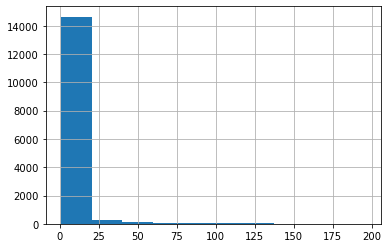

In [852]:
df.publisher.value_counts().loc[df.publisher.value_counts() <200].hist()

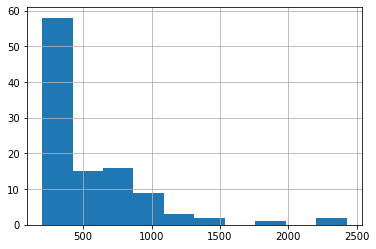

In [856]:
df.publisher.value_counts().loc[df.publisher.value_counts() >=200].hist()

A large number of publishers have published less than 25 books in this subsection and a few publishers have published 100s or 1000s. For now changing Nulls to Unknown and will decide how to deal with publishers after EDA. 

In [857]:
df.publisher[df.publisher.isnull()] = 'unknown'

<ipython-input-857-33f1b95d3d8b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.publisher[df.publisher.isnull()] = 'unknown'


In [859]:
df.isnull().sum()

text_reviews_count           0
series                       0
country_code                 0
language_code                0
popular_shelves              0
is_ebook                     0
average_rating               0
similar_books                0
format                       0
authors                      0
publisher                    0
num_pages                65261
publication_month        61621
edition_information     167517
publication_year         50584
book_id                      0
ratings_count                0
work_id                      0
title                        0
title_without_series         0
dtype: int64

In [861]:
df.num_pages.describe()

count     117645
unique      1071
top          320
freq        3983
Name: num_pages, dtype: object

In [868]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182906 entries, 0 to 219234
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   text_reviews_count    182906 non-null  int64  
 1   series                182906 non-null  object 
 2   country_code          182906 non-null  object 
 3   language_code         182906 non-null  object 
 4   popular_shelves       182906 non-null  object 
 5   is_ebook              182906 non-null  object 
 6   average_rating        182906 non-null  float64
 7   similar_books         182906 non-null  object 
 8   format                182906 non-null  object 
 9   authors               182906 non-null  object 
 10  publisher             182906 non-null  object 
 11  num_pages             117645 non-null  object 
 12  publication_month     121285 non-null  object 
 13  edition_information   15389 non-null   object 
 14  publication_year      132322 non-null  object 
 15  

In [870]:
df.dtypes

text_reviews_count        int64
series                   object
country_code             object
language_code            object
popular_shelves          object
is_ebook                 object
average_rating          float64
similar_books            object
format                   object
authors                  object
publisher                object
num_pages                object
publication_month        object
edition_information      object
publication_year         object
book_id                   int64
ratings_count             int64
work_id                   int64
title                    object
title_without_series     object
dtype: object

In [982]:
df.num_pages = pd.to_numeric(df.num_pages)

In [983]:
df.dtypes

text_reviews_count        int64
series                   object
country_code             object
language_code            object
popular_shelves          object
is_ebook                 object
average_rating          float64
similar_books            object
format                   object
authors                  object
publisher                object
num_pages               float64
publication_month        object
edition_information      object
publication_year         object
book_id                   int64
ratings_count             int64
work_id                   int64
title                    object
title_without_series     object
dtype: object

In [984]:
df.describe()

,text_reviews_count,average_rating,num_pages,book_id,ratings_count,work_id
count,182906.000000,182906.000000,163162.000000,1.829060e+05,1.829060e+05,1.829060e+05
mean,42.302565,3.840558,220.613047,1.462701e+07,6.088179e+02,1.866813e+07
std,405.181554,0.334367,240.253348,1.069201e+07,9.973194e+03,1.864386e+07
min,0.000000,0.000000,0.000000,1.640000e+02,0.000000e+00,1.370000e+02
25%,3.000000,3.660000,0.000000,3.979980e+06,1.200000e+01,1.780595e+06
50%,7.000000,3.860000,250.000000,1.358465e+07,4.000000e+01,1.431100e+07
75%,20.000000,4.050000,347.000000,2.335827e+07,1.540000e+02,4.003166e+07
max,78438.000000,5.000000,52015.000000,3.651716e+07,2.046499e+06,5.837010e+07


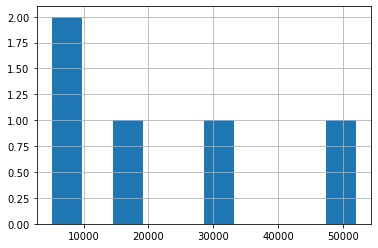

In [985]:
df.num_pages[df.num_pages>5000].hist()

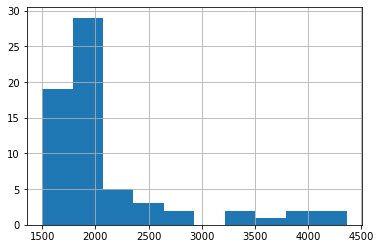

In [986]:
df.num_pages[(df.num_pages >= 1500) & (df.num_pages <= 5000)].hist()

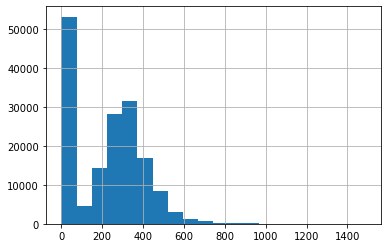

In [987]:
df.num_pages[df.num_pages<1500].hist(bins=20)

In [988]:
df.num_pages.isnull().sum()

19744

In [989]:
#How many mising pages for duplicate books? 
dups = df.title.value_counts().loc[df.title.value_counts() > 1].index

In [990]:
len(dups)

31543

In [991]:
df[(df.title.isin(dups)) & (df.num_pages.isnull())]

,text_reviews_count,series,country_code,language_code,popular_shelves,is_ebook,average_rating,similar_books,format,authors,publisher,num_pages,publication_month,edition_information,publication_year,book_id,ratings_count,work_id,title,title_without_series
3,8,[408775],US,eng,"[{'count': '51', 'name': 'to-read'}, {'count':...",false,3.30,[],hardcover,"[{'author_id': '190988', 'role': ''}]",Ulverscroft,NaN,12,Large Print,1975,1902202,52,1903897,"Dead in the Morning (Patrick Grant, #1)","Dead in the Morning (Patrick Grant, #1)"
13,1,[],US,eng,"[{'count': '2314', 'name': 'to-read'}, {'count...",false,3.79,"[311983, 704268, 710698, 2421615, 10900316, 68...",unknown_other,"[{'author_id': '19697', 'role': ''}]",unknown,NaN,NaN,NaN,NaN,353523,1,764462,Toxin,Toxin
36,2,[],US,eng,"[{'count': '88', 'name': 'to-read'}, {'count':...",false,3.69,[],softcover,"[{'author_id': '71096', 'role': ''}]",Little Brown and Company,NaN,5,NaN,1996,1650286,11,1644802,Fair Game,Fair Game
59,17,[],US,eng,"[{'count': '88', 'name': 'to-read'}, {'count':...",false,4.45,[],unknown_other,"[{'author_id': '4538804', 'role': ''}]",unknown,NaN,NaN,NaN,NaN,10313894,21,15216156,Just.Another.Common.Killer,Just.Another.Common.Killer
76,261,"[746844, 495652]",US,eng,"[{'count': '3887', 'name': 'to-read'}, {'count...",false,3.88,"[275470, 420307, 8038401, 9367664, 17286698, 3...",unknown_other,"[{'author_id': '38951', 'role': ''}]",unknown,NaN,NaN,NaN,NaN,175248,3396,2919130,Nocturnes,Nocturnes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219129,2,[800194],US,eng,"[{'count': '65', 'name': 'to-read'}, {'count':...",false,4.35,[],unknown_other,"[{'author_id': '4811623', 'role': ''}]",unknown,NaN,NaN,NaN,NaN,25595755,4,16128459,"The River and the Roses (Veronica Barry, #1)","The River and the Roses (Veronica Barry, #1)"
219131,7,[],US,eng,"[{'count': '113', 'name': 'to-read'}, {'count'...",false,3.72,"[1619917, 3002400, 5941054, 7740, 556766, 8865...",unknown_other,"[{'author_id': '48497', 'role': ''}, {'author_...",unknown,NaN,NaN,NaN,NaN,2904863,33,21940042,Dr. Jekyll and Mr. Hyde (Oxford Bookworms Libr...,Dr. Jekyll and Mr. Hyde (Oxford Bookworms Libr...
219156,7,"[491039, 920121]",US,eng,"[{'count': '13313', 'name': 'to-read'}, {'coun...",false,4.04,"[386252, 406575, 46432, 12806802, 253556, 6510...",softcover,"[{'author_id': '1411964', 'role': ''}]",unknown,NaN,NaN,NaN,NaN,6420106,90,2491780,Tinker Tailor Soldier Spy,Tinker Tailor Soldier Spy
219191,12,[944935],US,eng,"[{'count': '20', 'name': 'to-read'}, {'count':...",false,4.54,[],unknown_other,"[{'author_id': '943544', 'role': ''}]",unknown,NaN,NaN,NaN,NaN,33130814,27,51434842,Blood Mother (Flesh and Blood Trilogy #2),Blood Mother (Flesh and Blood Trilogy #2)


There's 35000+ entries that are duplicats and without page numbers. 

In [992]:
df.format[(df.title.isin(dups)) & (df.num_pages.isnull())].value_counts()

unknown_other    7211
softcover        2495
hardcover         862
large_print         1
Name: format, dtype: int64

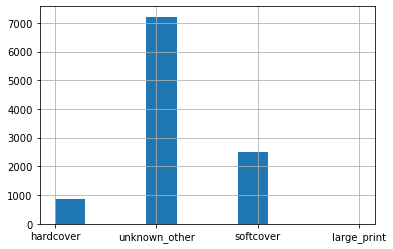

In [993]:
df.format[(df.title.isin(dups)) & (df.num_pages.isnull())].hist()

The majority of these are ebooks, unknown, or audio. Therefore, by nature, they do not have page numbers in the traditonal sense. We will leave them. 

In [994]:
df.format[(df.num_pages == 0)].value_counts()

ebook            33932
audio             8591
kindle            2898
audible           1220
unknown_other      122
softcover          105
hardcover           25
multiple             6
podiobook            5
Name: format, dtype: int64

In [995]:
df.format[(df.num_pages != 0)].value_counts()

softcover        63369
hardcover        23827
unknown_other    18830
ebook            15970
kindle            9927
audio             3192
audible            809
multiple            43
large_print         28
podiobook            7
Name: format, dtype: int64

There's more null values than 0 page numbers, with the most 0 values being audio books. 

In [996]:
df.format[(df.num_pages.isnull())].value_counts()

unknown_other    13333
softcover         4815
hardcover         1595
large_print          1
Name: format, dtype: int64

In [997]:
#Setting ebook, audio, kindle, audible, podiobook, and multiple to 0
page_form_list = ['ebook', 'audio', 'kindle', 'audible','multiple','podiobook']
df.num_pages[(df.format.isin(page_form_list) & df.num_pages.isnull())] = 0.0

<ipython-input-997-38f7f3fba0d9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.num_pages[(df.format.isin(page_form_list) & df.num_pages.isnull())] = 0.0


In [998]:
df.format[(df.num_pages.isnull())].value_counts()

unknown_other    13333
softcover         4815
hardcover         1595
large_print          1
Name: format, dtype: int64

In [999]:
df.format[(df.num_pages.isnull()) & (df.title.isin(dups))].value_counts()

unknown_other    7211
softcover        2495
hardcover         862
large_print         1
Name: format, dtype: int64

In [1013]:
test_group = df[df.title.isin(dups)]

In [1016]:
test_group[test_group.title == 'Black Heart']

,text_reviews_count,series,country_code,language_code,popular_shelves,is_ebook,average_rating,similar_books,format,authors,publisher,num_pages,publication_month,edition_information,publication_year,book_id,ratings_count,work_id,title,title_without_series
41762,11,[547176],US,eng,"[{'count': '55', 'name': 'to-read'}, {'count':...",false,3.84,[],softcover,"[{'author_id': '576663', 'role': ''}]",unknown,NaN,NaN,NaN,NaN,11807299,57,16760733,Black Heart,Black Heart
97024,16,[],US,eng,"[{'count': '231', 'name': 'to-read'}, {'count'...",false,3.78,"[1207540, 1118874, 1098095, 876822, 1458480, 8...",softcover,"[{'author_id': '39467', 'role': ''}]",Fawcett,704.0,3,NaN,1995,212346,788,775122,Black Heart,Black Heart
219221,1,[],US,eng,"[{'count': '231', 'name': 'to-read'}, {'count'...",false,3.78,"[1207540, 1118874, 1098095, 876822, 1458480, 8...",unknown_other,"[{'author_id': '39467', 'role': ''}]",unknown,NaN,NaN,NaN,NaN,2247090,7,775122,Black Heart,Black Heart


In [1019]:
test_group.describe()

,text_reviews_count,average_rating,num_pages,book_id,ratings_count,work_id
count,106886.000000,106886.000000,96317.000000,1.068860e+05,1.068860e+05,1.068860e+05
mean,57.073555,3.838145,234.665957,1.424318e+07,8.711462e+02,1.678872e+07
std,525.058105,0.295660,252.417281,1.040316e+07,1.288502e+04,1.780163e+07
min,0.000000,0.000000,0.000000,1.640000e+02,0.000000e+00,4.340000e+02
25%,3.000000,3.670000,0.000000,5.216116e+06,1.100000e+01,1.603174e+06
50%,7.000000,3.860000,272.000000,1.316131e+07,4.000000e+01,8.586623e+06
75%,22.000000,4.030000,368.000000,2.273269e+07,1.740000e+02,2.595723e+07
max,78438.000000,5.000000,52015.000000,3.651716e+07,2.046499e+06,5.836634e+07


In [1021]:
test_group[(test_group.text_reviews_count <10) & (test_group.ratings_count<100)].dropna(thresh=3)

,text_reviews_count,series,country_code,language_code,popular_shelves,is_ebook,average_rating,similar_books,format,authors,publisher,num_pages,publication_month,edition_information,publication_year,book_id,ratings_count,work_id,title,title_without_series
3,8,[408775],US,eng,"[{'count': '51', 'name': 'to-read'}, {'count':...",false,3.30,[],hardcover,"[{'author_id': '190988', 'role': ''}]",Ulverscroft,NaN,12,Large Print,1975,1902202,52,1903897,"Dead in the Morning (Patrick Grant, #1)","Dead in the Morning (Patrick Grant, #1)"
5,3,[199039],US,eng,"[{'count': '1694', 'name': 'mystery'}, {'count...",false,3.96,"[93575, 280849, 243401, 77617]",audio,"[{'author_id': '123715', 'role': ''}, {'author...",HarperAudio,0.0,3,NaN,2013,16158998,5,2288775,A Murder is Announced,A Murder is Announced
6,5,[],US,eng,"[{'count': '27', 'name': 'to-read'}, {'count':...",true,3.80,[],ebook,"[{'author_id': '13658169', 'role': ''}]",unknown,0.0,NaN,NaN,NaN,25162836,8,44866515,Dark Flames Rising,Dark Flames Rising
8,6,[],US,eng,"[{'count': '171', 'name': 'to-read'}, {'count'...",false,4.14,[],softcover,"[{'author_id': '4577517', 'role': ''}]",280 Steps,228.0,11,NaN,2014,22722787,18,42251489,The Cost of Doing Business,The Cost of Doing Business
9,2,[199041],US,eng,"[{'count': '1642', 'name': 'mystery'}, {'count...",false,3.93,"[126675, 280990, 660268, 77615, 909334, 243398]",audio,"[{'author_id': '123715', 'role': ''}, {'author...",HarperAudio,0.0,3,NaN,2013,16158996,5,6490729,4:50 From Paddington,4:50 From Paddington
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219219,3,[],US,eng,"[{'count': '779', 'name': 'currently-reading'}...",false,3.94,"[1227734, 482639, 4774462, 244474, 3991890, 51...",unknown_other,"[{'author_id': '24689', 'role': ''}, {'author_...",Orion,5.0,NaN,NaN,NaN,2751632,6,14592071,Hold Tight,Hold Tight
219221,1,[],US,eng,"[{'count': '231', 'name': 'to-read'}, {'count'...",false,3.78,"[1207540, 1118874, 1098095, 876822, 1458480, 8...",unknown_other,"[{'author_id': '39467', 'role': ''}]",unknown,NaN,NaN,NaN,NaN,2247090,7,775122,Black Heart,Black Heart
219222,2,[789875],US,eng,"[{'count': '443', 'name': 'to-read'}, {'count'...",false,4.09,[],hardcover,"[{'author_id': '7011369', 'role': ''}]",Quercus Publishing Ltd,416.0,9,NaN,2015,27637705,9,44871703,"Blood and Bone (Alice Madison, #3)","Blood and Bone (Alice Madison, #3)"
219227,4,[],US,eng,"[{'count': '604', 'name': 'to-read'}, {'count'...",true,4.24,[],kindle,"[{'author_id': '7741497', 'role': ''}, {'autho...",Chromatic Press,219.0,9,NaN,2014,23363286,15,42919549,Dead Endings,Dead Endings


In [1022]:
#Come back here

In [1024]:
df.edition_information.nunique()

3057

In [1026]:
df.edition_information.value_counts()

Unabridged               2238
Large Print              2196
Abridged                  966
First                     637
First Edition             616
                         ... 
Visual Novel                1
Gold Medal 341              1
Abridged; 2 cassettes       1
PerfectBound(tm) v1         1
Dominoes Two                1
Name: edition_information, Length: 3057, dtype: int64

In [1030]:
find_formats(df,"edition_information", "nabridg")

nabridg results are:
 Unabridged                          2238
Unabridged download                   62
unabridged                            55
Unabridged Audiobook                  38
Unabridged - Audible Edition          33
                                    ... 
Unabridged/eAudiobook                  1
Unabridged; Playaway                   1
Unabridged - US Digital Download       1
unabridged: 9h 19min                   1
unabridged on 8 cds                    1
Name: edition_information, Length: 186, dtype: int64


In [1031]:
find_formats(df,"edition_information", "casse")

casse results are:
 cassette                                                 2
Six 1-hour cassettes                                     1
7 sound cassettes (9.75 hr.) : analog                    1
11 cassettes, 15.5  hours                                1
Unabridged 5 sound cassette                              1
unabridged 8 sound cassettes (8 hrs., 18 min.)           1
Abridged, 4 audio cassettes, approximately 4.5 hours.    1
Abridged; 2 cassettes                                    1
10 cassettes                                             1
Abridged; 2 sound cassettes (176 min.)                   1
Name: edition_information, dtype: int64


In [1032]:
find_formats(df,"edition_information", "irst")

irst results are:
 First                                    637
First Edition                            616
first                                     96
First edition                             85
Facsimile of first edition                57
                                        ... 
First eBook                                1
reprint/first paperpack                    1
First Corgi edition                        1
Crossroad Press First Digital Edition      1
Five Star First Edition                    1
Name: edition_information, Length: 205, dtype: int64


In [1037]:
find_formats(df,"edition_information", "Large")

Large results are:
 Large Print                                       2196
Large print                                         82
Large Print Edition                                 36
Large print edition                                  8
Larger Print                                         6
Ulverscroft Large Print                              4
Large Print, Famous Authors Series                   3
Large Print edition                                  3
Large print book                                     2
Thorndike Large Print                                2
Thorndike Press Large Print Mystery Series           2
Chivers Large Print Mystery                          2
Harlequin Intrigue #1322 Larger Print                1
Harlequin Intrigue #886 Larger Print                 1
Charnwood Large Print                                1
16 Point Large Print                                 1
Large Print, Film Tie-in Edition                     1
Wheeler Large Print                          

In [1038]:
change_formats(df,"edition_information", "Large", "Large Print")
change_formats(df,"edition_information", "large", "Large Print")

/Users/jensensj/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [1039]:
change_formats(df,"edition_information", "casse", "Cassette")

/Users/jensensj/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [1040]:
find_formats(df,"edition_information", "Unabridg")

Unabridg results are:
 Unabridged                                        2238
Unabridged download                                 62
Unabridged Audiobook                                38
Unabridged - Audible Edition                        33
Unabridged edition                                  22
                                                  ... 
Audible Audio Edition Unabridged 10 hrs 59 min       1
Audible Audio Edition Unabridged 4 hrs 31 min        1
Unabridged, 7 hours and 26 minutes                   1
Audiobook, Unabridged                                1
Unabridged 10 Hours, 37 Minutes                      1
Name: edition_information, Length: 161, dtype: int64


In [1041]:
find_formats(df,"edition_information", "unabridg")

unabridg results are:
 unabridged                                                  55
Audible - unabridged                                         8
unabridged Audible download                                  6
unabridged Aubible download                                  2
unabridged selection                                         1
Complete and unabridged                                      1
eAudiobook/unabridged                                        1
unabridged: 7h 35min                                         1
unabridged audio                                             1
Library Edition; unabridged                                  1
unabridged on 8 cds                                          1
MP3, unabridged                                              1
1st unabridged edition                                       1
Downloadable unabridged                                      1
Complete and unabridged (6 sound discs (5 hr., 35 min.))     1
unabridged audiobook            

In [1042]:
change_formats(df,"edition_information", "Unabridg", "Unabridged")
change_formats(df,"edition_information", "unabridg", "Unabridged")

/Users/jensensj/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [1044]:
df.edition_information.nunique()

2824

In [1048]:
find_formats(df,"edition_information", "First edition")

First edition results are:
 First edition                                 85
First edition. Jonathan Press Mystery J17.     1
William Morrow First edition                   1
Name: edition_information, dtype: int64


In [1052]:
df.edition_information.value_counts().loc[df.edition_information.value_counts() >50]

Unabridged                        2823
Large Print                       2386
Abridged                           966
First                              637
First Edition                      616
1                                  480
1st                                381
1st Edition                        358
eAudiobook                         183
1st edition                        159
2nd Edition                        123
UK                                 121
Second Edition                     112
first                               96
2nd edition                         92
2nd                                 86
First edition                       85
British Library Crime Classics      79
Audible Audio Edition               71
2                                   67
Second                              65
Facsimile of first edition          57
Reprint Edition                     56
Name: edition_information, dtype: int64

In [1053]:
change_formats(df,'edition_information',"First", "First Edition")
change_formats(df,'edition_information',"1", "First Edition")
change_formats(df,'edition_information',"1st", "First Edition")
change_formats(df,'edition_information',"1st Edition", "First Edition")
change_formats(df,'edition_information',"first", "First Edition")
change_formats(df,'edition_information',"First edition", "First Edition")
change_formats(df,'edition_information',"First", "First Edition")

/Users/jensensj/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [1202]:
change_formats(df,'edition_information',"2nd Edition", "Second Edition")
change_formats(df,'edition_information',"2nd edition", "Second Edition")
change_formats(df,'edition_information',"2nd", "Second Edition")
change_formats(df,'edition_information',"2", "Second Edition")
change_formats(df,'edition_information',"Second", "Second Edition")
change_formats(df,'edition_information',"second", "Second Edition")

/Users/jensensj/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [1056]:
df.edition_information.value_counts().loc[df.edition_information.value_counts() >20]

First Edition                             3992
Unabridged                                2823
Large Print                               2386
Abridged                                   966
Second Edition                             844
eAudiobook                                 183
UK                                         121
British Library Crime Classics              79
Audible Audio Edition                       71
Reprint Edition                             56
Reprint                                     48
Book Club Edition                           47
Reprint edition                             45
The Agatha Christie Mystery Collection      39
UK Edition                                  38
Oxford World's Classics                     37
Kobo                                        36
Digital                                     35
U.K.                                        35
Revised Edition                             34
Kindle Edition                              31
Kindle       

In [1061]:
find_formats(df,"edition_information", "lub")

lub results are:
 Book Club Edition                     47
Book Club                              9
Crime Club                             4
book club edition                      3
Detective Book Club                    3
Crime Club edition                     2
Book club                              2
The Detective Club                     2
Detective Book Club Edition            2
Book club edition                      2
Science Fiction Book Club              2
The Detective Club edition             1
Thriller Book Club Edition             1
British book club edition              1
Book club ed.                          1
Target Book Club Pick                  1
Book Club (BCE/BOMC) edition           1
Exclusive Book Club Edition            1
Pub. for The Crime Club                1
Crime Club Edition                     1
Book-of-the-Month-Club                 1
Book of the Month Club                 1
Expanded Book-Club Edition             1
Book Club edition.                     

In [1062]:
change_formats(df,"edition_information", "lub", "Book Club Edition")

/Users/jensensj/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [1064]:
find_formats(df,"edition_information", "preloaded")

preloaded results are:
 preloaded digital audio player    22
preloaded digital audio            2
preloaded digital media player     1
Playaway preloaded audiobook       1
Name: edition_information, dtype: int64


In [1065]:
change_formats(df,"edition_information", "preloaded", "Preloaded Audio Player")

/Users/jensensj/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [1066]:
find_formats(df,"edition_information", "UK")

UK results are:
 UK                                        121
UK Edition                                 38
UK edition                                 25
UK Ed.                                      4
UK Paperback                                3
UK Trade Paperback                          3
UK paperback edition                        2
UK Airports edition                         2
UK edition: Hardy Boys #34                  1
UK Hardback                                 1
Paperback UK                                1
UK trade paperback                          1
UK/Australia edition                        1
UK Kindle Edition                           1
Movie Tie-in UK / Australia / NZ            1
Fifteenth Impression, UK                    1
UK &amp; Commonwealth                       1
UK hardback edition                         1
UK Edition (Hardy Boys, #30)                1
UK Eidtion                                  1
UK Deluxe Limited Edition                   1
UK Edition (Hardy

In [1067]:
change_formats_formats(df,"edition_information", "UK", "UK Edition")

/Users/jensensj/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [1069]:
find_formats(df,"edition_information", "3rd")

3rd results are:
 3rd edition                      19
3rd                              13
3rd Edition                      10
3rd printing edition              2
3rd Reprint                       1
3rd Edition, revised              1
3rd Paperback Printing            1
3rd Impression                    1
3rd pocket size printing, 346     1
3rd Edition, Revised Edition      1
3rd edition Special edition       1
3rd printing                      1
Name: edition_information, dtype: int64


In [1070]:
find_formats(df,"edition_information", "ird")

ird results are:
 Third Edition                               14
Third                                        8
Third Printing                               3
Third edition                                2
Third Dell Printing                          1
Third Crest Printing                         1
Third Printing Before Publication            1
Third Edition- Author's Prefered Edition     1
REVISED-Third Edition                        1
REVISED/Third Edition                        1
Name: edition_information, dtype: int64


In [1078]:
change_formats(df,"edition_information", "3rd", "Third Edition")
change_formats(df,"edition_information", "ird", "Third Edition")
change_formats(df,"edition_information", "3", "Third Edition")

In [1079]:
find_formats(df,"edition_information", "ourt")

ourt results are:
 Fourth Edition    25
Name: edition_information, dtype: int64


In [1080]:
change_formats(df,"edition_information", "ourt", "Fourth Edition")
change_formats(df,"edition_information", "4th", "Fourth Edition")

In [1081]:
find_formats(df,"edition_information", "limi")

limi results are:
 signed limited to 500 numbered copies                          5
signed limited to 750 numbered copies                          4
signed limited to 450 numbered copies                          2
limited edition hardcover                                      1
signed limited to 400 numbered copies                          1
signed limited to 90 numbered copies                           1
signed limited to 85 numbered copies                           1
signed limited to 750 unnumbered copies                        1
special limited print edition                                  1
Black Voltage Edition, signed limited to 75 numbered copies    1
signed limited to 500 numbered copies (slipcase optional)      1
limited Edition                                                1
signed limited to 57 numbered copies                           1
signed slipcased edition limited to 750 numbered copies        1
Name: edition_information, dtype: int64


In [1082]:
change_formats(df,"edition_information", "limi", "Limited Edition")

/Users/jensensj/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [1086]:
find_formats(df,"edition_information", "evise")

evise results are:
 Revised Edition                              34
Revised text                                 24
Revised                                      13
revised edition                               5
Revised &amp; Updated Edition                 4
Revised edition                               3
Revised Cover                                 2
revised                                       2
Revised and Updated                           2
New revised and updated paperback edition     1
Revised Author's Edition                      1
Revised and Updated Edition                   1
Anniversary Edition - Revised Version         1
Revised second edition                        1
revised cover                                 1
Name: edition_information, dtype: int64


In [1088]:
find_formats(df,"edition_information", "revisio")

revisio results are:
 revision    1
Name: edition_information, dtype: int64


In [1090]:
change_formats(df,"edition_information", "evise", "Revised Edition")
change_formats(df,"edition_information", "revisio", "Revised Edition")

/Users/jensensj/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [1091]:
df.edition_information.value_counts().loc[df.edition_information.value_counts() >20]

First Edition                             3992
Unabridged                                2823
Large Print                               2386
Abridged                                   966
Second Edition                             844
UK Edition                                 221
Third Edition                              215
eAudiobook                                 183
Book Club Edition                           98
Revised Edition                             96
British Library Crime Classics              79
Audible Audio Edition                       71
Reprint Edition                             56
Limited Edition                             50
Reprint                                     48
Reprint edition                             45
The Agatha Christie Mystery Collection      39
Oxford World's Classics                     37
Kobo                                        36
Digital                                     35
U.K.                                        35
Kindle Editio

In [1092]:
find_formats(df,"edition_information", "eprint")

eprint results are:
 Reprint Edition                                56
Reprint                                        48
Reprint edition                                45
Reprint; U.S. paperback Edition                17
reprint                                         8
Collier Reprint                                 1
Reprints Le Dahlia Noir                         1
reprint under Grossett &amp; Dunlap imprint     1
S5896; Reprint Edition edition                  1
Reprint. U.S. Paperback                         1
Crime Classic Reprint                           1
Short Story Index Reprint Series                1
Reprint of the Pantheon Books ed.               1
Name: edition_information, dtype: int64


In [1093]:
change_formats(df,"edition_information", "eprint", "Reprint Edition")

/Users/jensensj/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [1097]:
find_formats(df,"edition_information", "ibrary Ed")

ibrary Ed results are:
 Library Edition                        29
Popular Library Edition                 1
(Library Edition)                       1
School &amp; Library Edition            1
Scholastic Library Edition              1
Library Ed.                             1
Audio Library Edition                   1
Wordsworth Classics Library Edition     1
Special Library Edition                 1
Name: edition_information, dtype: int64


In [1123]:
find_formats(df,"edition_information", "Library")

Library results are:
 British Library Crime Classics                         79
Library Edition                                        63
Library                                                24
Penguin English Library                                 5
Library Binding                                         3
True Crime Library                                      2
British Library Classics                                2
Popular Library                                         1
Neversink Library                                       1
Listening Library                                       1
Perennial Library P456                                  1
Wordsworth Library Collection                           1
Perennial Library, P644                                 1
Perennial Library                                       1
Library of Contemporary Americana                       1
The Barnes &amp; Noble Library of Essential Reading     1
The Mystery Library                               

In [1099]:
change_formats(df,"edition_information", "ibrary Ed", "Library Edition")
change_formats(df,"edition_information", "ibrary ed", "Library Edition")

/Users/jensensj/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [1103]:
change_formats(df,"edition_information", "indle", "Kindle Edition")

/Users/jensensj/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [1125]:
find_formats(df,"edition_information", "player")

player results are:
 Portable Digital Audioplayer    1
Name: edition_information, dtype: int64


In [1126]:
change_formats(df,"edition_information", "loaded", "Preloaded Audio Player")
change_formats(df,"edition_information", "player", "Preloaded Audio Player")


/Users/jensensj/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [1127]:
df.edition_information.value_counts().loc[df.edition_information.value_counts() >20]

First Edition                             3992
Unabridged                                2823
Large Print                               2386
Abridged Edition                           994
Second Edition                             844
UK Edition                                 265
Third Edition                              215
eAudiobook                                 183
Reprint Edition                            182
Book Club Edition                           98
Revised Edition                             96
Kindle Edition                              92
British Library Crime Classics              79
Audible Audio Edition                       71
Library Edition                             63
Preloaded Audio Player                      53
Limited Edition                             50
The Agatha Christie Mystery Collection      39
Oxford World's Classics                     37
Kobo                                        36
Digital                                     35
Penguin Moder

In [1128]:
change_formats(df,"edition_information", "Abridged", "Abridged Edition")

/Users/jensensj/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [1129]:
df.edition_information.value_counts().loc[df.edition_information.value_counts() >20]

First Edition                             3992
Unabridged                                2823
Large Print                               2386
Abridged Edition                           994
Second Edition                             844
UK Edition                                 265
Third Edition                              215
eAudiobook                                 183
Reprint Edition                            182
Book Club Edition                           98
Revised Edition                             96
Kindle Edition                              92
British Library Crime Classics              79
Audible Audio Edition                       71
Library Edition                             63
Preloaded Audio Player                      53
Limited Edition                             50
The Agatha Christie Mystery Collection      39
Oxford World's Classics                     37
Kobo                                        36
Digital                                     35
Penguin Moder

In [1162]:
change_formats(df,"edition_information", "ovie", "Movie Tie-in Edition")

In [1131]:
df.edition_information.value_counts().loc[df.edition_information.value_counts() >10]

First Edition                             3992
Unabridged                                2823
Large Print                               2386
Abridged Edition                           994
Second Edition                             844
UK Edition                                 265
Third Edition                              215
eAudiobook                                 183
Reprint Edition                            182
Book Club Edition                           98
Revised Edition                             96
Kindle Edition                              92
British Library Crime Classics              79
Audible Audio Edition                       71
Library Edition                             63
Preloaded Audio Player                      53
Limited Edition                             50
The Agatha Christie Mystery Collection      39
Oxford World's Classics                     37
Kobo                                        36
Digital                                     35
Penguin Moder

In [1132]:
find_formats(df,"edition_information", "igital")

igital results are:
 Digital                                    35
Digital Download Edition                    6
Digital Download                            5
Digital Edition                             3
Downloadable digital audio                  2
Digital sound file                          1
Digital edition                             1
Crossroad Press Digital Edition edition     1
Amazon Digital Services, Inc.               1
Digital dowload                             1
digital                                     1
Digital Book                                1
Playaway Digital Audio Player               1
Crossroad Press Digital Edition             1
Digital original                            1
Digital download                            1
Digital epub                                1
Name: edition_information, dtype: int64


In [1133]:
change_formats(df,"edition_information", "igital", "Digital Edition")

/Users/jensensj/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [1136]:
change_formats(df,"edition_information", "Audible", "Audible Edition")

/Users/jensensj/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [1138]:
change_formats(df,"edition_information", "Audio", "Audio Edition")

/Users/jensensj/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [1139]:
df.edition_information.value_counts().loc[df.edition_information.value_counts() >10]

First Edition                             3992
Unabridged                                2823
Large Print                               2386
Abridged Edition                           994
Second Edition                             844
Audio Edition                              283
UK Edition                                 265
Third Edition                              215
Reprint Edition                            182
Audible Edition                            120
Book Club Edition                           98
Revised Edition                             96
Kindle Edition                              92
British Library Crime Classics              79
Library Edition                             63
Digital Edition                             63
Limited Edition                             50
The Agatha Christie Mystery Collection      39
Oxford World's Classics                     37
Kobo                                        36
Penguin Modern Classics                     29
Omnibus      

In [1163]:
change_formats(df,"edition_information", "U.K", "UK Edition")

In [1164]:
change_formats(df,"edition_information", "Canadi", "CA Edition")

In [1165]:
change_formats(df,"edition_information", "AUS", "Australia Edition")

In [1166]:
change_formats(df,"edition_information", "US", "USA Edition")

In [1167]:
df.edition_information.value_counts().loc[df.edition_information.value_counts() >10]

First Edition                             3992
Unabridged                                2823
Large Print                               2386
Abridged Edition                           994
Second Edition                             844
Audio Edition                              283
UK Edition                                 265
Third Edition                              215
Reprint Edition                            182
Audible Edition                            120
Book Club Edition                           98
Revised Edition                             96
Kindle Edition                              92
British Library Crime Classics              79
Movie Tie-in Edition                        78
Digital Edition                             63
Library Edition                             63
USA Edition                                 61
Limited Edition                             50
The Agatha Christie Mystery Collection      39
Oxford World's Classics                     37
Kobo         

In [1178]:
change_formats(df,"edition_information", "ernation", "International Edition")

/Users/jensensj/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [1186]:
find_formats(df,"edition_information", "iB")

iB results are:
 iBook                                                                                 3
iBooks                                                                                2
iBooks Epub                                                                           1
Download for iPhone, iPad, or iPod touch with iBooks and on a computer with iTunes    1
Name: edition_information, dtype: int64


In [1187]:
change_formats(df,"edition_information", "epub", "Epub Edition")
change_formats(df,"edition_information", "Epub", "Epub Edition")
change_formats(df,"edition_information", "nline", "Epub Edition")
change_formats(df,"edition_information", "iB", "Epub Edition")


/Users/jensensj/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [1189]:
find_formats(df,"edition_information", "llust")

llust results are:
 Illustrated Edition                         18
Illustrated                                 14
Special Illustrated Edition                  8
Special Illustrated Collector's Edition      2
Illustrated Edition with Map                 1
Illustrated 6th Edition                      1
Full Color Illustrated Edition               1
illustrated                                  1
Crave Illustrated Edition                    1
complete, illustrated                        1
Limited Edition, Author Illustrated Copy     1
Golden Illustrated Classic                   1
(Illustrated Edition                         1
Illustrated Classic Editions                 1
Illustrated Colour Plate edition             1
llustrated                                   1
Classics Illustrated                         1
Name: edition_information, dtype: int64


In [1192]:
change_formats(df,"edition_information", "llust", "Illlustrated Edition")

/Users/jensensj/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [1193]:
change_formats(df,"edition_information", "pecia", "Special Edition")

In [1195]:
find_formats(df,"edition_information", "rigina")

rigina results are:
 Paperback Original                       17
Original text                            11
Original edition                          4
Original Edition                          2
Hard Cover Original Fiction               2
Original                                  2
A Tor.Com Original                        2
Original recording                        1
original cover edition for B00IOY7FJ8     1
Vintage Crime/Black Lizard Original       1
original cover                            1
standard print original fiction           1
Original Direct-to-Ebook                  1
An original publication                   1
Original Trade Paperback                  1
original edition                          1
Original Classic Edition                  1
Name: edition_information, dtype: int64


In [1197]:
change_formats(df,"edition_information", "rigina", "Original Edition")

In [1203]:
df.edition_information.value_counts().loc[df.edition_information.value_counts() >9]

First Edition                             3992
Unabridged                                2823
Large Print                               2386
Abridged Edition                           994
Second Edition                             862
Audio Edition                              283
UK Edition                                 265
Third Edition                              215
Reprint Edition                            182
Audible Edition                            120
Book Club Edition                           98
Revised Edition                             96
Kindle Edition                              92
British Library Crime Classics              79
Movie Tie-in Edition                        78
Digital Edition                             63
Library Edition                             63
USA Edition                                 61
Original Edition                            50
Limited Edition                             50
Special Edition                             50
Illlustrated 

In [1207]:
change_formats(df,"edition_information", "Nook", "Nook Edition")
change_formats(df,"edition_information", "nook", "Nook Edition")

In [1213]:
find_formats(df,"edition_information", "New ed")

New ed results are:
 New edition    4
Name: edition_information, dtype: int64


In [1214]:
change_formats(df,"edition_information", "New Ed", "New Edition")
change_formats(df,"edition_information", "New Ed", "New edition")

/Users/jensensj/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [1215]:
find_formats(df,"edition_information", "new")

new results are:
 Series([], Name: edition_information, dtype: int64)


In [1221]:
#Replacing NaN with "none"
df.edition_information.fillna('none', inplace=True)

In [1222]:
df.head()

,text_reviews_count,series,country_code,language_code,popular_shelves,is_ebook,average_rating,similar_books,format,authors,publisher,num_pages,publication_month,edition_information,publication_year,book_id,ratings_count,work_id,title,title_without_series
0,15,[169353],US,eng,"[{'count': '159', 'name': 'to-read'}, {'count'...",false,3.93,"[439108, 522621, 116770, 1275927, 6202655, 840...",hardcover,"[{'author_id': '37778', 'role': ''}]",Simon & Schuster UK,400.0,4,none,2009,6066814,186,6243149,"Crowner Royal (Crowner John Mystery, #13)","Crowner Royal (Crowner John Mystery, #13)"
1,60,[1052227],US,eng,"[{'count': '54', 'name': 'currently-reading'},...",true,4.33,[],ebook,"[{'author_id': '242185', 'role': ''}]",unknown,318.0,NaN,none,NaN,33394837,269,54143148,The House of Memory (Pluto's Snitch #2),The House of Memory (Pluto's Snitch #2)
2,23,[953679],US,eng,"[{'count': '90', 'name': 'to-read'}, {'count':...",true,3.49,[],ebook,"[{'author_id': '15104629', 'role': ''}, {'auth...",Amazon Digital Services,0.0,NaN,none,NaN,29074697,192,49305010,The Slaughtered Virgin of Zenopolis (Inspector...,The Slaughtered Virgin of Zenopolis (Inspector...
3,8,[408775],US,eng,"[{'count': '51', 'name': 'to-read'}, {'count':...",false,3.30,[],hardcover,"[{'author_id': '190988', 'role': ''}]",Ulverscroft,NaN,12,Large Print,1975,1902202,52,1903897,"Dead in the Morning (Patrick Grant, #1)","Dead in the Morning (Patrick Grant, #1)"
5,3,[199039],US,eng,"[{'count': '1694', 'name': 'mystery'}, {'count...",false,3.96,"[93575, 280849, 243401, 77617]",audio,"[{'author_id': '123715', 'role': ''}, {'author...",HarperAudio,0.0,3,none,2013,16158998,5,2288775,A Murder is Announced,A Murder is Announced


In [1230]:
df[(df.format == "large_print")].count()

text_reviews_count      28
series                  28
country_code            28
language_code           28
popular_shelves         28
is_ebook                28
average_rating          28
similar_books           28
format                  28
authors                 28
publisher               28
num_pages               27
publication_month       15
edition_information     28
publication_year        16
book_id                 28
ratings_count           28
work_id                 28
title                   28
title_without_series    28
dtype: int64

Need to go back and set none edition to large print and then do the formatting to go to hardcover, softcover, etc. 

In [1231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182906 entries, 0 to 219234
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   text_reviews_count    182906 non-null  int64  
 1   series                182906 non-null  object 
 2   country_code          182906 non-null  object 
 3   language_code         182906 non-null  object 
 4   popular_shelves       182906 non-null  object 
 5   is_ebook              182906 non-null  object 
 6   average_rating        182906 non-null  float64
 7   similar_books         182906 non-null  object 
 8   format                182906 non-null  object 
 9   authors               182906 non-null  object 
 10  publisher             182906 non-null  object 
 11  num_pages             163162 non-null  float64
 12  publication_month     121285 non-null  object 
 13  edition_information   182906 non-null  object 
 14  publication_year      132322 non-null  object 
 15  

In [1232]:
df.publisher

0             Simon & Schuster UK
1                         unknown
2         Amazon Digital Services
3                     Ulverscroft
5                     HarperAudio
                   ...           
219229                    unknown
219231              MX Publishing
219232              MX Publishing
219233                    unknown
219234              MX Publishing
Name: publisher, Length: 182906, dtype: object

## Now we will look at separating out the author information, cleaning up series #'s, and look at popular shelves and similar books columns

In [1234]:
df.authors.head()

0                 [{'author_id': '37778', 'role': ''}]
1                [{'author_id': '242185', 'role': ''}]
2    [{'author_id': '15104629', 'role': ''}, {'auth...
3                [{'author_id': '190988', 'role': ''}]
5    [{'author_id': '123715', 'role': ''}, {'author...
Name: authors, dtype: object

In [1236]:
auths = df.authors.apply(pd.Series)

In [1276]:
auths.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182906 entries, 0 to 219234
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       182906 non-null  object
 1   1       27600 non-null   object
 2   2       4132 non-null    object
 3   3       1597 non-null    object
 4   4       1097 non-null    object
 5   5       909 non-null     object
 6   6       817 non-null     object
 7   7       743 non-null     object
 8   8       687 non-null     object
 9   9       614 non-null     object
 10  10      546 non-null     object
 11  11      502 non-null     object
 12  12      460 non-null     object
 13  13      416 non-null     object
 14  14      367 non-null     object
 15  15      305 non-null     object
 16  16      272 non-null     object
 17  17      239 non-null     object
 18  18      217 non-null     object
 19  19      196 non-null     object
 20  20      162 non-null     object
 21  21      131 non-null     object
 

In [1242]:
drops = auths.dropna(thresh=3).index

In [1244]:
df.drop(drops)

,text_reviews_count,series,country_code,language_code,popular_shelves,is_ebook,average_rating,similar_books,format,authors,publisher,num_pages,publication_month,edition_information,publication_year,book_id,ratings_count,work_id,title,title_without_series
0,15,[169353],US,eng,"[{'count': '159', 'name': 'to-read'}, {'count'...",false,3.93,"[439108, 522621, 116770, 1275927, 6202655, 840...",hardcover,"[{'author_id': '37778', 'role': ''}]",Simon & Schuster UK,400.0,4,none,2009,6066814,186,6243149,"Crowner Royal (Crowner John Mystery, #13)","Crowner Royal (Crowner John Mystery, #13)"
1,60,[1052227],US,eng,"[{'count': '54', 'name': 'currently-reading'},...",true,4.33,[],ebook,"[{'author_id': '242185', 'role': ''}]",unknown,318.0,NaN,none,NaN,33394837,269,54143148,The House of Memory (Pluto's Snitch #2),The House of Memory (Pluto's Snitch #2)
2,23,[953679],US,eng,"[{'count': '90', 'name': 'to-read'}, {'count':...",true,3.49,[],ebook,"[{'author_id': '15104629', 'role': ''}, {'auth...",Amazon Digital Services,0.0,NaN,none,NaN,29074697,192,49305010,The Slaughtered Virgin of Zenopolis (Inspector...,The Slaughtered Virgin of Zenopolis (Inspector...
3,8,[408775],US,eng,"[{'count': '51', 'name': 'to-read'}, {'count':...",false,3.30,[],hardcover,"[{'author_id': '190988', 'role': ''}]",Ulverscroft,NaN,12,Large Print,1975,1902202,52,1903897,"Dead in the Morning (Patrick Grant, #1)","Dead in the Morning (Patrick Grant, #1)"
5,3,[199039],US,eng,"[{'count': '1694', 'name': 'mystery'}, {'count...",false,3.96,"[93575, 280849, 243401, 77617]",audio,"[{'author_id': '123715', 'role': ''}, {'author...",HarperAudio,0.0,3,none,2013,16158998,5,2288775,A Murder is Announced,A Murder is Announced
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219229,58,[1035852],US,eng,"[{'count': '49', 'name': 'to-read'}, {'count':...",true,3.55,[],ebook,"[{'author_id': '4278425', 'role': ''}]",unknown,0.0,NaN,none,NaN,31522515,340,52207636,Walking on My Grave,Walking on My Grave
219231,6,[],US,eng,"[{'count': '497', 'name': 'to-read'}, {'count'...",false,3.81,"[23012660, 13763625, 18079894, 21432940, 17343...",softcover,"[{'author_id': '16176417', 'role': ''}]",MX Publishing,208.0,10,none,2015,26591045,16,46613239,The Sensible Necktie and Other Stories of Sher...,The Sensible Necktie and Other Stories of Sher...
219232,3,[],US,eng,"[{'count': '735', 'name': 'to-read'}, {'count'...",false,4.11,"[24808217, 17620517, 13496536, 21947925, 18079...",softcover,"[{'author_id': '5401342', 'role': ''}]",MX Publishing,288.0,7,none,2015,25727303,6,45563843,Mrs. Hudson in New York,Mrs. Hudson in New York
219233,7,[],US,eng,"[{'count': '36', 'name': 'to-read'}, {'count':...",true,4.00,[],ebook,"[{'author_id': '4590885', 'role': ''}]",unknown,0.0,9,none,2014,23252156,16,42794368,Wicked Reflection,Wicked Reflection


In [1258]:
au1 = auths[0].apply(pd.Series)
au2 = auths[1].apply(pd.Series)
au3 = auths[2].apply(pd.Series)

In [1259]:
au1

,author_id,role
0,37778,
1,242185,
2,15104629,
3,190988,
5,123715,
...,...,...
219229,4278425,
219231,16176417,
219232,5401342,
219233,4590885,


---Code below need added---

In [1260]:
au1.role.value_counts()

                                   180718
Editor                                957
Pseudonym                             425
Creator                                54
Author                                 49
                                    ...  
Original author                         1
Narrated by:Jasmine Blackborow          1
Translator                              1
Editor, and Narrator                    1
Nick Podehl, Teri Schnaubelt            1
Name: role, Length: 157, dtype: int64

In [1261]:
au2.role.value_counts()

                         10933
Narrator                  6838
Translator                2201
Reading                   1105
Illustrator               1073
                         ...  
creator                      1
mrj`@                        1
director                     1
preface                      1
Narrator / Production        1
Name: role, Length: 227, dtype: int64

In [1262]:
au3.role.value_counts()

                        1375
Narrator                 818
Translator               281
Contributor              267
Reading                  220
                        ... 
tbsyT                      1
Writing as                 1
Graphic Cover Design       1
English Adaptation         1
Adapted By                 1
Name: role, Length: 113, dtype: int64

For the sake of space, we will only look at books with 2 or less authors

In [1264]:
au1.isnull().sum()

author_id    0
role         0
dtype: int64

In [1265]:
au2.isnull().sum()

0            182906
author_id    155306
role         155306
dtype: int64

In [1267]:
au2.head()

,0,author_id,role
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,14425713,
3,NaN,NaN,NaN
5,NaN,552417,Narrator


In [1269]:
au2.drop(columns=0, inplace=True)

In [1266]:
au3.isnull().sum()

0            182906
author_id    178774
role         178774
dtype: int64

Joining au1 and au2 to df

In [1284]:
au1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182906 entries, 0 to 219234
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   author_id  182906 non-null  object
 1   role       182906 non-null  object
dtypes: object(2)
memory usage: 9.2+ MB


In [1285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182906 entries, 0 to 219234
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   text_reviews_count    182906 non-null  int64  
 1   series                182906 non-null  object 
 2   country_code          182906 non-null  object 
 3   language_code         182906 non-null  object 
 4   popular_shelves       182906 non-null  object 
 5   is_ebook              182906 non-null  object 
 6   average_rating        182906 non-null  float64
 7   similar_books         182906 non-null  object 
 8   format                182906 non-null  object 
 9   authors               182906 non-null  object 
 10  publisher             182906 non-null  object 
 11  num_pages             163162 non-null  float64
 12  publication_month     121285 non-null  object 
 13  edition_information   182906 non-null  object 
 14  publication_year      132322 non-null  object 
 15  

In [1286]:
au2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182906 entries, 0 to 219234
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  27600 non-null  object
 1   role       27600 non-null  object
dtypes: object(2)
memory usage: 9.2+ MB


In [1287]:
au1.columns = ['First_Author_ID', 'First_Author_Role']

In [1288]:
au1.head()

,First_Author_ID,First_Author_Role
0,37778,
1,242185,
2,15104629,
3,190988,
5,123715,


In [1289]:
au2.columns = ['Second_Author_ID', 'Second_Author_Role']

In [1290]:
au2.head()

,Second_Author_ID,Second_Author_Role
0,NaN,NaN
1,NaN,NaN
2,14425713,
3,NaN,NaN
5,552417,Narrator


In [1300]:
df['first_author_id'] = au1.First_Author_ID
df['first_author_role'] = au1.First_Author_Role
df['second_author_id'] = au2.Second_Author_ID
df['second_author_role'] = au2.Second_Author_Role

In [1301]:
df.head()

,text_reviews_count,series,country_code,language_code,popular_shelves,is_ebook,average_rating,similar_books,format,authors,...,book_id,ratings_count,work_id,title,title_without_series,First_Author_ID,first_author_id,first_author_role,second_author_id,second_author_role
0,15,[169353],US,eng,"[{'count': '159', 'name': 'to-read'}, {'count'...",false,3.93,"[439108, 522621, 116770, 1275927, 6202655, 840...",hardcover,"[{'author_id': '37778', 'role': ''}]",...,6066814,186,6243149,"Crowner Royal (Crowner John Mystery, #13)","Crowner Royal (Crowner John Mystery, #13)",37778,37778,,NaN,NaN
1,60,[1052227],US,eng,"[{'count': '54', 'name': 'currently-reading'},...",true,4.33,[],ebook,"[{'author_id': '242185', 'role': ''}]",...,33394837,269,54143148,The House of Memory (Pluto's Snitch #2),The House of Memory (Pluto's Snitch #2),242185,242185,,NaN,NaN
2,23,[953679],US,eng,"[{'count': '90', 'name': 'to-read'}, {'count':...",true,3.49,[],ebook,"[{'author_id': '15104629', 'role': ''}, {'auth...",...,29074697,192,49305010,The Slaughtered Virgin of Zenopolis (Inspector...,The Slaughtered Virgin of Zenopolis (Inspector...,15104629,15104629,,14425713,
3,8,[408775],US,eng,"[{'count': '51', 'name': 'to-read'}, {'count':...",false,3.30,[],hardcover,"[{'author_id': '190988', 'role': ''}]",...,1902202,52,1903897,"Dead in the Morning (Patrick Grant, #1)","Dead in the Morning (Patrick Grant, #1)",190988,190988,,NaN,NaN
5,3,[199039],US,eng,"[{'count': '1694', 'name': 'mystery'}, {'count...",false,3.96,"[93575, 280849, 243401, 77617]",audio,"[{'author_id': '123715', 'role': ''}, {'author...",...,16158998,5,2288775,A Murder is Announced,A Murder is Announced,123715,123715,,552417,Narrator


In [1304]:
df.drop(columns=['authors'], inplace=True)

In [1305]:
find_formats(df, "first_author_role", "utho")

utho results are:
 Author    155
Name: first_author_role, dtype: int64


In [1309]:
change_formats(df, "first_author_role", "utho", "Author")

/Users/jensensj/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [1307]:
find_formats(df, "first_author_role", "rit")

rit results are:
 Series([], Name: first_author_role, dtype: int64)


In [1310]:
change_formats(df, "first_author_role", "rit", "Author")

In [1311]:
find_formats(df, "first_author_role", "rra")

rra results are:
 Narrator                            11
Narrator Barry Eisler                2
Stephanie Cole-Narrator              2
:Avita Jay (narrator)                1
 Lucy Price-Lewis, narrator          1
Narrator- Emily Beresford            1
 Tavia Gilbert (Narrator)            1
  (Narrators) Elizabeth Knowelde     1
Editor, and Narrator                 1
Narrated by:Jasmine Blackborow       1
Narrator Lorelei King                1
- Narrator Simon Vance               1
Narrated by: Alison Campbell         1
Narrated ByAntonia Beamish           1
Narrated by:Julia Barrie             1
Narrated by Corey Gagne              1
Mark Deakins narrator                1
Narrated by: James Naughton          1
Narrated by: Teri , Scott , Amy      1
Narrator Beth Chalmers               1
Narrated by: Lorna Raver             1
Narrated by Jan Cramer               1
Narrated by:John Telfer              1
Narrated by: Hannah Murray           1
Narrator Catherine Mills             1
Narrate

In [1313]:
df[df.first_author_role == "Narrator Barry Eisler"]

,text_reviews_count,series,country_code,language_code,popular_shelves,is_ebook,average_rating,similar_books,format,publisher,...,book_id,ratings_count,work_id,title,title_without_series,First_Author_ID,first_author_id,first_author_role,second_author_id,second_author_role
126033,1,[],US,eng,"[{'count': '92', 'name': 'to-read'}, {'count':...",false,4.10,"[21800211, 15997485, 13266465, 234337, 1362660...",audible,Brilliance Audio,...,30727399,4,19932288,The Khmer Kill,The Khmer Kill,603,603,Narrator Barry Eisler,NaN,NaN
216672,4,[],US,eng,"[{'count': '146', 'name': 'currently-reading'}...",false,3.85,"[12988422, 29493393, 24611449, 22259773, 22522...",audible,Brilliance Audio,...,30726474,18,45688382,The God's Eye View,The God's Eye View,603,603,Narrator Barry Eisler,NaN,NaN


In [1314]:
# ID Corresponds to narrator name. Proceeding with Narrator
change_formats(df, "first_author_role", "rra", "Narrator")

/Users/jensensj/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [1317]:
find_formats(df, "first_author_role", "itor")

itor results are:
 Editor                              957
editor                               46
Editor / Contributor                 28
Editor/Contributor                   14
Editor, Contributor                   5
Editor, Introduction                  5
Editor & Contributor                  4
editor / contributor                  3
Editor and Contributor                3
editor/contributor                    3
Series Editor                         2
Editor/Introduction                   2
Editor; Introduction                  2
Editor, Foreword                      1
Editor/Introduction/Afterword         1
Editor, Introduction, Contributo      1
(editor)                              1
Name: first_author_role, dtype: int64


In [1318]:
change_formats(df, "first_author_role", "itor", "Editor")

/Users/jensensj/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [1319]:
find_formats(df, "first_author_role", "ont")

ont results are:
 Contributor                  48
contributor & redactional     2
Contributor and Forward       1
contributor                   1
Translator & Contributor      1
Name: first_author_role, dtype: int64


In [1320]:
change_formats(df, "first_author_role", "ont", "Contributor")

/Users/jensensj/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [1324]:
df.first_author_role.value_counts()

                       180718
Editor                   1078
Pseudonym                 425
Author                    155
Creator                    54
                        ...  
Translator                  1
Photographs                 1
a                           1
Adapter                     1
Translator, Adaptor         1
Name: first_author_role, Length: 80, dtype: int64

In [1327]:
find_formats(df, "first_author_role", "apt")

apt results are:
 Adapter                 34
Adapter/Novelization    30
Adaptor                 17
Adapted by               8
Adapter, Illustrator     5
Adapted By               5
Text, Adapter            2
Adaptation               1
Adaptaition              1
Adaption                 1
Adaptor, Illustrator     1
Adapter                  1
Translator, Adaptor      1
adaptor                  1
Name: first_author_role, dtype: int64


In [1328]:
change_formats(df, "first_author_role", "apt", "Adapter")

/Users/jensensj/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [1331]:
find_formats(df, "first_author_role", "eat")

eat results are:
 Creator                54
Series Creator         12
Creator,Foreword by     1
creator                 1
Name: first_author_role, dtype: int64


In [1332]:
change_formats(df, "first_author_role", "eat", "Creator")

/Users/jensensj/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [1343]:
find_formats(df, "first_author_role", "ame")

ame results are:
 House Name    41
Pen Name      11
pen name       7
Name: first_author_role, dtype: int64


In [1348]:
change_formats(df, "first_author_role", "seu", "Pseudonym")
change_formats(df, "first_author_role", "Pen Name", "Pseudonym")
change_formats(df, "first_author_role", "pen name", "Pseudonym")
change_formats(df, "first_author_role", "Alias", "Pseudonym")

/Users/jensensj/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [1349]:
df.first_author_role.value_counts()[df.first_author_role.value_counts()>5]

                 180718
Editor             1078
Pseudonym           497
Author              155
Adapter             108
Creator              68
Contributor          53
House Name           41
Narrator             40
Reading              20
Preface              14
Introduction         12
Illustrations         9
Illustrator           7
Translation           6
Compilation           6
Foreword              6
Name: first_author_role, dtype: int64

In [1353]:
find_formats(df, "first_author_role", "omp")

omp results are:
 Compilation    6
Composer       2
Compiler       1
Name: first_author_role, dtype: int64


In [1354]:
change_formats(df, "first_author_role", "omp", "Compilation")

/Users/jensensj/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [1356]:
find_formats(df, "first_author_role", "ans")

ans results are:
 Translation    6
Translator     1
Name: first_author_role, dtype: int64


In [1357]:
change_formats(df, "first_author_role", "ans", "Translation")

/Users/jensensj/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [1361]:
df.first_author_role.value_counts()#[df.first_author_role.value_counts()>1]

                                    180718
Editor                                1078
Pseudonym                              497
Author                                 155
Adapter                                108
Creator                                 68
Contributor                             53
House Name                              41
Narrator                                40
Reading                                 20
Preface                                 14
Introduction                            12
Compilation                              9
Illustrations                            9
Translation                              7
Illustrator                              7
Foreword                                 6
Atributed to                             5
With                                     4
Novelization                             4
Producer                                 4
Screenplay                               3
as Diane Miller                          3
Retold by  

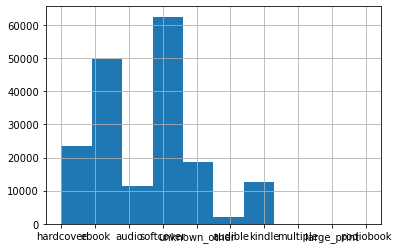

In [1365]:
df.format[df.first_author_role == ""].hist()

In [1366]:
find_formats(df, "first_author_role", "lust")

lust results are:
 Illustrations        9
Illustrator          7
Text, Illustrator    1
Name: first_author_role, dtype: int64


In [1367]:
change_formats(df, "first_author_role", "lust", "Illustrator")

/Users/jensensj/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [1368]:
change_formats(df, "first_author_role", "Editro", "Editor")
change_formats(df, "first_author_role", "Auhor", "Author")

In [1371]:
df.second_author_role.value_counts()[df.second_author_role.value_counts()>20]

                  10933
Narrator           6838
Translator         2201
Reading            1105
Illustrator        1073
Editor              817
Translation         628
Introduction        588
narrator            498
Read by             481
Contributor         289
Illustrations       265
Reader              256
Foreword            150
translator          149
Series Creator      132
Narrator             84
Creator              78
With                 78
Narrated by          74
Traduction           47
Pseudonym            43
Series Editor        40
Ubersetzer           39
Foreword by          37
Afterword            34
Ghostwriter          34
contributor          23
Performance          23
Name: second_author_role, dtype: int64

In [1372]:
find_formats(df,"second_author_role","rrat")

rrat results are:
 Narrator                 6838
narrator                  498
Narrator                   84
Narrated by                74
Narrrator                   3
Narrators                   2
-Narrator                   2
 Narrator                   2
narrato                     1
narrataor                   1
Narratator                  1
Narrator / Production       1
narrator                    1
narrator(s                  1
Narrator\t                  1
Actress/Narrator            1
narratot                    1
Name: second_author_role, dtype: int64


In [1373]:
change_formats(df,"second_author_role","rrat","Narrator")

/Users/jensensj/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [1375]:
find_formats(df,"second_author_role","ead")

ead results are:
 Reading    1105
Read by     481
Reader      256
Read By       5
reader        4
read by       2
Read          1
Name: second_author_role, dtype: int64


In [1376]:
change_formats(df,"second_author_role","ead","Narrator")

In [1380]:
find_formats(df, "second_author_role", "host")

host results are:
 Ghostwriter      34
Ghost Writer      7
ghost author      1
Ghost Writer      1
Name: second_author_role, dtype: int64


In [1381]:
change_formats(df, "second_author_role", "host", "Ghost Writer")

/Users/jensensj/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [1387]:
find_formats(df, "second_author_role", "Afterword")

Afterword results are:
 Afterword                       34
Editor/Afterword                 1
Afterword / Author Interview     1
Name: second_author_role, dtype: int64


In [1388]:
change_formats(df, "second_author_role", "Afterword", "Afterword")

/Users/jensensj/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [1389]:
find_formats(df, "second_author_role", "uth")

uth results are:
 Author's True Name    9
co-author             8
Editor/Author         5
Co-Author             3
Joint Author          2
Original Author       1
Editor, Author        1
Co-author             1
House Author          1
author/illustrator    1
Original_author       1
author, artist        1
Co- Author            1
Original author       1
Name: second_author_role, dtype: int64


In [1390]:
change_formats(df, "second_author_role", "uth", "Author")

/Users/jensensj/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [1392]:
find_formats(df, "second_author_role", "itor")

itor results are:
 Editor                     817
Series Editor               40
editor                      17
Editor / Contributor        12
Editor, Introduction         5
Editor/Introduction          3
Editor                       1
editor, foreword             1
Editor / Introduction        1
editor/introduction          1
Series editor                1
Editor/Contributor           1
Editor, Introduction by      1
editor/contributor           1
Founding Editor              1
Editor, Contributor          1
Editor, Translator           1
Consulting Editor            1
Contributor, Editor          1
Name: second_author_role, dtype: int64


In [1393]:
change_formats(df, "second_author_role", "itor", "Editor")

/Users/jensensj/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [1394]:
find_formats(df, "second_author_role", "trib")

trib results are:
 Contributor        289
contributor         23
Contribution by      3
Contriburor          1
Contributer          1
Name: second_author_role, dtype: int64


In [1395]:
change_formats(df, "second_author_role", "trib", "Contributor")

/Users/jensensj/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [1396]:
find_formats(df, "second_author_role", "eat")

eat results are:
 Series Creator        132
Creator                78
Created by              9
Series Co-creator       4
Series Creator          1
creator                 1
Series creator          1
creator and extras      1
Name: second_author_role, dtype: int64


In [1397]:
change_formats(df, "second_author_role", "eat", "Creator")

/Users/jensensj/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [1398]:
find_formats(df, "second_author_role", "ith")

ith results are:
 With                         78
with original material by     6
Name: second_author_role, dtype: int64


In [1399]:
find_formats(df, "second_author_role", "ith")

rig results are:
 with original material by    6
Original Screenplay          1
Name: second_author_role, dtype: int64


In [1401]:
df.second_author_role.value_counts()[df.second_author_role.value_counts()>10]

                   10933
Narrator            9366
Translator          2201
Illustrator         1073
Editor               907
Translation          628
Introduction         588
Contributor          317
Illustrations        265
Creator              227
Foreword             150
translator           149
With                  78
Traduction            47
Pseudonym             43
Ghost Writer          43
Ubersetzer            39
Foreword by           37
Afterword             36
Author                36
Performance           23
illustrator           18
Visual Art            17
Performer             16
Writing As            16
Artist                15
Photographer          15
Cover                 14
Performed by          13
pseud.                11
Pseudonym             11
also writing as       11
Name: second_author_role, dtype: int64

In [1403]:
find_formats(df, "second_author_role", "eu")
find_formats(df, "second_author_role", "iting")

eu results are:
 Pseudonym     43
Pseudonym     11
pseud.        11
pseudonym      6
pseudonym      1
Name: second_author_role, dtype: int64
iting results are:
 Writing As         16
also writing as    11
writing as          3
Writing as          1
Name: second_author_role, dtype: int64


In [1404]:
change_formats(df, "second_author_role", "eu", "Pseudonym")
change_formats(df, "second_author_role", "iting", "Pseudonym")

/Users/jensensj/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [1405]:
find_formats(df, "second_author_role", "erfo")

erfo results are:
 Performance     23
Performer       16
Performed by    13
Performed        3
Name: second_author_role, dtype: int64


In [1406]:
change_formats(df, "second_author_role", "erfo", "Perform")

/Users/jensensj/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [1407]:
find_formats(df, "second_author_role", "lust")

lust results are:
 Illustrator            1073
Illustrations           265
illustrator              18
Cover Illustrator         4
Ilustrator                2
Illustrator               2
Cover Illustrator         1
Illustrator (Cover)       1
Cover Illustration        1
illustrations             1
Name: second_author_role, dtype: int64


In [1408]:
change_formats(df, "second_author_role", "lust", "Illustrator")

/Users/jensensj/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [1409]:
df.second_author_role.value_counts()[df.second_author_role.value_counts()>10]

                10933
Narrator         9366
Translator       2201
Illustrator      1368
Editor            907
Translation       628
Introduction      588
Contributor       317
Creator           227
Foreword          150
translator        149
Pseudonym         103
With               78
Perform            55
Traduction         47
Ghost Writer       43
Ubersetzer         39
Foreword by        37
Author             36
Afterword          36
Visual Art         17
Photographer       15
Artist             15
Cover              14
Name: second_author_role, dtype: int64

In [1410]:
find_formats(df, "second_author_role", "rans")

rans results are:
 Translator               2201
Translation               628
translator                149
Translator                  2
TranslatorMy                1
Transcriber                 1
Translators                 1
Translator/Adaptation       1
Trans.                      1
Name: second_author_role, dtype: int64


In [1411]:
change_formats(df, "second_author_role", "rans", "Translator")

/Users/jensensj/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [1415]:
df.second_author_role.value_counts()[df.second_author_role.value_counts()>15]

                10933
Narrator         9366
Translator       2985
Illustrator      1368
Editor            907
Introduction      588
Contributor       317
Creator           227
Foreword          150
Pseudonym         103
With               78
Perform            55
Traduction         47
Ghost Writer       43
Ubersetzer         39
Foreword by        37
Afterword          36
Author             36
Visual Art         17
Name: second_author_role, dtype: int64

In [1417]:
df.first_author_role.value_counts()[df.first_author_role.value_counts()>10]

                180718
Editor            1079
Pseudonym          497
Author             156
Adapter            108
Creator             68
Contributor         53
House Name          41
Narrator            40
Reading             20
Illustrator         17
Preface             14
Introduction        12
Name: first_author_role, dtype: int64

In [1418]:
df.head()

,text_reviews_count,series,country_code,language_code,popular_shelves,is_ebook,average_rating,similar_books,format,publisher,...,book_id,ratings_count,work_id,title,title_without_series,First_Author_ID,first_author_id,first_author_role,second_author_id,second_author_role
0,15,[169353],US,eng,"[{'count': '159', 'name': 'to-read'}, {'count'...",false,3.93,"[439108, 522621, 116770, 1275927, 6202655, 840...",hardcover,Simon & Schuster UK,...,6066814,186,6243149,"Crowner Royal (Crowner John Mystery, #13)","Crowner Royal (Crowner John Mystery, #13)",37778,37778,,NaN,NaN
1,60,[1052227],US,eng,"[{'count': '54', 'name': 'currently-reading'},...",true,4.33,[],ebook,unknown,...,33394837,269,54143148,The House of Memory (Pluto's Snitch #2),The House of Memory (Pluto's Snitch #2),242185,242185,,NaN,NaN
2,23,[953679],US,eng,"[{'count': '90', 'name': 'to-read'}, {'count':...",true,3.49,[],ebook,Amazon Digital Services,...,29074697,192,49305010,The Slaughtered Virgin of Zenopolis (Inspector...,The Slaughtered Virgin of Zenopolis (Inspector...,15104629,15104629,,14425713,
3,8,[408775],US,eng,"[{'count': '51', 'name': 'to-read'}, {'count':...",false,3.30,[],hardcover,Ulverscroft,...,1902202,52,1903897,"Dead in the Morning (Patrick Grant, #1)","Dead in the Morning (Patrick Grant, #1)",190988,190988,,NaN,NaN
5,3,[199039],US,eng,"[{'count': '1694', 'name': 'mystery'}, {'count...",false,3.96,"[93575, 280849, 243401, 77617]",audio,HarperAudio,...,16158998,5,2288775,A Murder is Announced,A Murder is Announced,123715,123715,,552417,Narrator


--Need Code above--

In [1429]:
df.series = df.series.str[0]

In [1430]:
df.head()

,text_reviews_count,series,country_code,language_code,popular_shelves,is_ebook,average_rating,similar_books,format,publisher,...,book_id,ratings_count,work_id,title,title_without_series,First_Author_ID,first_author_id,first_author_role,second_author_id,second_author_role
0,15,169353,US,eng,"[{'count': '159', 'name': 'to-read'}, {'count'...",false,3.93,"[439108, 522621, 116770, 1275927, 6202655, 840...",hardcover,Simon & Schuster UK,...,6066814,186,6243149,"Crowner Royal (Crowner John Mystery, #13)","Crowner Royal (Crowner John Mystery, #13)",37778,37778,,NaN,NaN
1,60,1052227,US,eng,"[{'count': '54', 'name': 'currently-reading'},...",true,4.33,[],ebook,unknown,...,33394837,269,54143148,The House of Memory (Pluto's Snitch #2),The House of Memory (Pluto's Snitch #2),242185,242185,,NaN,NaN
2,23,953679,US,eng,"[{'count': '90', 'name': 'to-read'}, {'count':...",true,3.49,[],ebook,Amazon Digital Services,...,29074697,192,49305010,The Slaughtered Virgin of Zenopolis (Inspector...,The Slaughtered Virgin of Zenopolis (Inspector...,15104629,15104629,,14425713,
3,8,408775,US,eng,"[{'count': '51', 'name': 'to-read'}, {'count':...",false,3.30,[],hardcover,Ulverscroft,...,1902202,52,1903897,"Dead in the Morning (Patrick Grant, #1)","Dead in the Morning (Patrick Grant, #1)",190988,190988,,NaN,NaN
5,3,199039,US,eng,"[{'count': '1694', 'name': 'mystery'}, {'count...",false,3.96,"[93575, 280849, 243401, 77617]",audio,HarperAudio,...,16158998,5,2288775,A Murder is Announced,A Murder is Announced,123715,123715,,552417,Narrator


--Need code below--

In [1439]:
ps = df.popular_shelves.apply(pd.Series)

In [1440]:
ps

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,"{'count': '159', 'name': 'to-read'}","{'count': '12', 'name': 'historical-fiction'}","{'count': '11', 'name': 'mystery'}","{'count': '10', 'name': 'historical-mystery'}","{'count': '7', 'name': 'medieval'}","{'count': '6', 'name': 'historical'}","{'count': '5', 'name': 'crime'}","{'count': '3', 'name': 'series'}","{'count': '3', 'name': 'ebook'}","{'count': '3', 'name': 'fiction'}",...,"{'count': '1', 'name': 'books-to-get-list'}","{'count': '1', 'name': 'knight-bernard'}","{'count': '1', 'name': 'mp3'}","{'count': '1', 'name': 'needed-mysteries'}","{'count': '1', 'name': 'historical-hoodunits'}","{'count': '1', 'name': 'detective-crowner-john'}","{'count': '1', 'name': 'books-in-english'}","{'count': '1', 'name': 'to'}","{'count': '1', 'name': 'need'}","{'count': '1', 'name': '1100s-ad'}"
1,"{'count': '54', 'name': 'currently-reading'}","{'count': '8', 'name': 'netgalley'}","{'count': '5', 'name': 'kindle'}","{'count': '3', 'name': 'read-2017'}","{'count': '3', 'name': 'read-in-2017'}","{'count': '3', 'name': 'paranormal'}","{'count': '2', 'name': 'ghost'}","{'count': '2', 'name': 'next-in-a-series'}","{'count': '2', 'name': 'mystery-pi'}","{'count': '2', 'name': 'ebook'}",...,"{'count': '1', 'name': 'giveaways-entered'}","{'count': '1', 'name': 'need'}","{'count': '1', 'name': 'ghosts'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"{'count': '90', 'name': 'to-read'}","{'count': '53', 'name': 'currently-reading'}","{'count': '5', 'name': 'humor'}","{'count': '3', 'name': 'kindle'}","{'count': '2', 'name': 'on-my-kindle'}","{'count': '2', 'name': 'kindle-books'}","{'count': '2', 'name': 'series'}","{'count': '2', 'name': 'free-reads'}","{'count': '1', 'name': 'series-first'}","{'count': '1', 'name': 'labeled-2016'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"{'count': '51', 'name': 'to-read'}","{'count': '9', 'name': 'mystery'}","{'count': '3', 'name': 'england'}","{'count': '3', 'name': 'mysteries'}","{'count': '2', 'name': 'currently-reading'}","{'count': '1', 'name': 'year-2017'}","{'count': '1', 'name': 'mood-comforting'}","{'count': '1', 'name': 'milieu-small-town'}","{'count': '1', 'name': 'milieu-british'}","{'count': '1', 'name': 'milieu-1960s-70s'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"{'count': '1694', 'name': 'mystery'}","{'count': '553', 'name': 'to-read'}","{'count': '411', 'name': 'fiction'}","{'count': '370', 'name': 'crime'}","{'count': '223', 'name': 'mysteries'}","{'count': '198', 'name': 'classics'}","{'count': '151', 'name': 'favorites'}","{'count': '146', 'name': 'owned'}","{'count': '123', 'name': 'detective'}","{'count': '117', 'name': 'books-i-own'}",...,"{'count': '10', 'name': 'mystery-crime-thriller'}","{'count': '10', 'name': 'classic-mystery'}","{'count': '10', 'name': 'listened-to'}","{'count': '10', 'name': 'paperback'}","{'count': '10', 'name': 'whodunit'}","{'count': '10', 'name': 'mystery-and-crime'}","{'count': '10', 'name': 'britain'}","{'count': '10', 'name': 'policier'}","{'count': '10', 'name': 'cozy'}","{'count': '10', 'name': 'murder-mysteries'}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219229,"{'count': '49', 'name': 'to-read'}","{'count': '36', 'name': 'currently-reading'}","{'count': '24', 'name': 'mystery'}","{'count': '9', 'name': 'fiction'}","{'count': '5', 'name': 'mysteries'}","{'count': '5', 'name': 'cozy-mysteries'}","{'count': '5', 'name': 'cozy-mystery'}","{'count': '4', 'name': 'mystery-cozy'}","{'count': '4', 'name': 'carolyn-hart'}","{'count': '3', 'name': 'audio'}",...,"{'count': '1', 'name': 'crime-fiction'}","{'count': '1', 'name': 'bookstores'}","{'count': '1', 'name': 'amateur-sleuth'}","{'count': '1', 'name': 'mysteries2017'}","{'count': '1', 'name': 'ebooks'}","{'count': '1', 'name': '2017-challenge'}","{'count': '1', 'name': 'next-in-series'}","{'count': '1', 'name': 'adult'}","{'count': '1', 'name': 'myst'}","{'count': '1', 'name': 'mystery-crime'}"
219231,"{'

In [1442]:
ps[0].apply(pd.Series)

,count,name
0,159,to-read
1,54,currently-reading
2,90,to-read
3,51,to-read
5,1694,mystery
...,...,...
219229,49,to-read
219231,497,to-read
219232,735,to-read
219233,36,to-read


In [1443]:
pd.DataFrame(df['popular_shelves'].tolist())

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,"{'count': '159', 'name': 'to-read'}","{'count': '12', 'name': 'historical-fiction'}","{'count': '11', 'name': 'mystery'}","{'count': '10', 'name': 'historical-mystery'}","{'count': '7', 'name': 'medieval'}","{'count': '6', 'name': 'historical'}","{'count': '5', 'name': 'crime'}","{'count': '3', 'name': 'series'}","{'count': '3', 'name': 'ebook'}","{'count': '3', 'name': 'fiction'}",...,"{'count': '1', 'name': 'books-to-get-list'}","{'count': '1', 'name': 'knight-bernard'}","{'count': '1', 'name': 'mp3'}","{'count': '1', 'name': 'needed-mysteries'}","{'count': '1', 'name': 'historical-hoodunits'}","{'count': '1', 'name': 'detective-crowner-john'}","{'count': '1', 'name': 'books-in-english'}","{'count': '1', 'name': 'to'}","{'count': '1', 'name': 'need'}","{'count': '1', 'name': '1100s-ad'}"
1,"{'count': '54', 'name': 'currently-reading'}","{'count': '8', 'name': 'netgalley'}","{'count': '5', 'name': 'kindle'}","{'count': '3', 'name': 'read-2017'}","{'count': '3', 'name': 'read-in-2017'}","{'count': '3', 'name': 'paranormal'}","{'count': '2', 'name': 'ghost'}","{'count': '2', 'name': 'next-in-a-series'}","{'count': '2', 'name': 'mystery-pi'}","{'count': '2', 'name': 'ebook'}",...,"{'count': '1', 'name': 'giveaways-entered'}","{'count': '1', 'name': 'need'}","{'count': '1', 'name': 'ghosts'}",None,None,None,None,None,None,None
2,"{'count': '90', 'name': 'to-read'}","{'count': '53', 'name': 'currently-reading'}","{'count': '5', 'name': 'humor'}","{'count': '3', 'name': 'kindle'}","{'count': '2', 'name': 'on-my-kindle'}","{'count': '2', 'name': 'kindle-books'}","{'count': '2', 'name': 'series'}","{'count': '2', 'name': 'free-reads'}","{'count': '1', 'name': 'series-first'}","{'count': '1', 'name': 'labeled-2016'}",...,None,None,None,None,None,None,None,None,None,None
3,"{'count': '51', 'name': 'to-read'}","{'count': '9', 'name': 'mystery'}","{'count': '3', 'name': 'england'}","{'count': '3', 'name': 'mysteries'}","{'count': '2', 'name': 'currently-reading'}","{'count': '1', 'name': 'year-2017'}","{'count': '1', 'name': 'mood-comforting'}","{'count': '1', 'name': 'milieu-small-town'}","{'count': '1', 'name': 'milieu-british'}","{'count': '1', 'name': 'milieu-1960s-70s'}",...,None,None,None,None,None,None,None,None,None,None
4,"{'count': '1694', 'name': 'mystery'}","{'count': '553', 'name': 'to-read'}","{'count': '411', 'name': 'fiction'}","{'count': '370', 'name': 'crime'}","{'count': '223', 'name': 'mysteries'}","{'count': '198', 'name': 'classics'}","{'count': '151', 'name': 'favorites'}","{'count': '146', 'name': 'owned'}","{'count': '123', 'name': 'detective'}","{'count': '117', 'name': 'books-i-own'}",...,"{'count': '10', 'name': 'mystery-crime-thriller'}","{'count': '10', 'name': 'classic-mystery'}","{'count': '10', 'name': 'listened-to'}","{'count': '10', 'name': 'paperback'}","{'count': '10', 'name': 'whodunit'}","{'count': '10', 'name': 'mystery-and-crime'}","{'count': '10', 'name': 'britain'}","{'count': '10', 'name': 'policier'}","{'count': '10', 'name': 'cozy'}","{'count': '10', 'name': 'murder-mysteries'}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182901,"{'count': '49', 'name': 'to-read'}","{'count': '36', 'name': 'currently-reading'}","{'count': '24', 'name': 'mystery'}","{'count': '9', 'name': 'fiction'}","{'count': '5', 'name': 'mysteries'}","{'count': '5', 'name': 'cozy-mysteries'}","{'count': '5', 'name': 'cozy-mystery'}","{'count': '4', 'name': 'mystery-cozy'}","{'count': '4', 'name': 'carolyn-hart'}","{'count': '3', 'name': 'audio'}",...,"{'count': '1', 'name': 'crime-fiction'}","{'count': '1', 'name': 'bookstores'}","{'count': '1', 'name': 'amateur-sleuth'}","{'count': '1', 'name': 'mysteries2017'}","{'count': '1', 'name': 'ebooks'}","{'count': '1', 'name': '2017-challenge'}","{'count': '1', 'name': 'next-in-series'}","{'count': '1', 'name': 'adult'}","{'count': '1', 'name': 'myst'}","{'count': '1', 'name': '

In [1451]:
df.columns

Index(['text_reviews_count', 'series', 'country_code', 'language_code',
       'is_ebook', 'average_rating', 'similar_books', 'format', 'publisher',
       'num_pages', 'publication_month', 'edition_information',
       'publication_year', 'book_id', 'ratings_count', 'work_id', 'title',
       'title_without_series', 'First_Author_ID', 'first_author_id',
       'first_author_role', 'second_author_id', 'second_author_role'],
      dtype='object')